# Project 2 - Ames Housing Data
___________________________

Contents:
 - [Problem Statement](#Problem-Statement)
     - [Aim Of The Project](#Aim-Of-The-Project)
 - [Data Overview](#Data-Overview)
 - [Data Cleaning](#Data-Cleaning)
     - [Encoding Ordinal Columns Into Ints](#Encoding-Ordinal-Columns-Into-Ints)
     - [Missing Data](#Missing-Data)
     - [Data Type](#Data-Type)
     - [Clean Datasets As csv](#Clean-Datasets-As-csv)
     - [Data Dictionary](#Data-Dictionary)
 - [Exploratory Data Analysis](#Exploratory-Data-Analysis)
     - [Summary Statistics](#Summary-Statistics-Of-Train-Dataset)
     - [Outliers And Anomalies](#Outliers-And-Anomalies)
     - [Exploring Columns Relationship](#Exploring-Columns-Relationship)
 - [Feature Creating](#Feature-Creating)
 - [Feature Selection](#Feature-Selection)
     - [Backward Elimination](#Backward-Elimination)
     - [Recursive Feature Elimination](#Recursive-Feature-Elimination)
 - [Preprocessing Data](#Preprocessing-Data)
 - [Modeling And Evaluation](#Modeling-And-Evaluation)
     - [Lasso](#Lasso)
     - [Linear Regression](#Linear-Regression)
     - [Ridge](#Ridge)
 - [Pridictions](#Pridictions)
 - [Inference](#Inference)
 - [Conclusion](#Conclusion)
 - [Recommendations](#Recommendations)
 - [Further research suggestions](#Further-research-suggestions)

## Problem Statement

A real estate market Dataset from Kaggle was used to identify and study the features which can contribute the most into the price (in dollars) prediction of property in Ames, Iowa, USA. The Dataset comprises sales from 2006 to 2010.

The Regression models (Linear Regression, Lasso Regression and Ridge Regression) were used for price prediction based on features from provided Dataset (CSV files). The performance of the model was gauged with R2 value.

The model is essential for all market stakeholders: house owners, landlords, real estate agents, their clients etc. It gives them the possibility of short-term and long-term financial planning as well as realistic property price.

### Aim Of The Project

1. Predict price based on feature provided (in dollars).
2. Select features which influence the price of the property.
3. Provide recommendations for stakeholders.

#### Answer the following questions:

1. With an increase of Overall Quality of property does price increase?
2. Does the price vary with different House Style?
3. Does older property cost less than newer ones?

In [135]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline

## Data Overview

In [136]:
# Uploading dataset with Id columns as indexes
df_train = pd.read_csv('./datasets/train.csv',index_col='Id')
df_test = pd.read_csv('./datasets/test.csv',index_col='Id')

In [137]:
# Looking at train dataframe first 5 rows
df_train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [138]:
# Checking duplicates
len(df_train)-len(df_train.drop_duplicates())
# There is no duplicate rows

0

In [139]:
# Checking columns names and if there are missing data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

We have 80 columns, 2051 rows. Some columns have missing data, we will explore them closely.
We also see that the names of the columns contain space between words and have capital letters, it is inconvenient to use so we will change it.

In [140]:
# Creating a function to change the columns' names in lower case without space between words
def column_name(df):
    """
    Take df - dataframe as an argument.
    Change column name to lower case 
    and replace space (' ') to underscore ('_')
    
    Return names of columns
    """
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')
    return df.columns

## Data Cleaning

In [141]:
# Changing the columns' names in lower case without space between words
column_name(df_train)
column_name(df_test)

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

In [142]:
# Looking at columns with missimg data
columns_with_null = df_train.isnull().sum()
print('Number of columns with missing data:',columns_with_null[columns_with_null >0].count())
columns_with_null[columns_with_null >0]

Number of columns with missing data: 26


lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

There are 26 columns with missing data. Some columns have more than 50% of missing data.

According to the data dictionary and csv file itself, we see that most of the missing values have meaning. Mostly, missing values represent 'no present' of the features in a particular property.

We also can see that some columns such as exter_qual','exter_cond','bsmt_qual','bsmt_cond','heating_qc', 'kitchen_qual','fireplace_qu','garage_qual','garage_cond','pool_qc' have categorical values with explicit order which we can convert this strings into ints.

### Encoding Ordinal Columns Into Ints

Table shows encoding of column rules

<center>

|                        Columns' names                        |                      Categorical values                      |                                       |
| :----------------------------------------------------------: | :----------------------------------------------------------: | :-----------------------------------: |
| 'exter_qual',<br/>'exter_cond',<br/>'bsmt_qual',<br/>'bsmt_cond',<br/>'heating_qc',<br/>'kitchen_qual',<br/>'fireplace_qu',<br/>'garage_qual',<br/>'garage_cond',<br/>'pool_qc' | Excellent<br/>Good<br/>Average/Typical<br/>Fair<br/>Poor<br/>No feature |    5<br/>4<br/>3<br/>2<br/>1<br/>0    |
|                          Utilities                           | AllPub All public Utilities (E,G,W,& S)<br/>NoSewr Electricity, Gas, and Water (Septic Tank)<br/>NoSeWa Electricity and Gas Only<br/>ELO Electricity only |          3<br/>2<br/>1<br/>0          |
|                         BsmtExposure                         | Gd Good Exposure <br/>Av Average Exposure<br/>Mn Mimimum Exposure<br/>No No Exposure<br/>NA No Basement |       4<br/>3<br/>2<br/>1<br/>0       |
|                         BsmtFinType1                         | GLQ Good Living Quarters<br/>ALQ Average Living Quarters<br/>BLQ Below Average Living Quarters<br/>Rec Average Rec Room<br/>LwQ Low Quality<br/>Unf Unfinshed<br/>NA No Basement | 6<br/>5<br/>4<br/>3<br/>2<br/>1<br/>0 |
|                         BsmtFinType2                         |                        NA No Basement                        |                'None'                 |
|                          CentralAir                          |                        N No<br/>Y Yes                        |                0<br/>1                |
|                            Fence                             | GdPrv Good Privacy<br/>MnPrv Minimum Privacy<br/>GdWo Good Wood<br/>MnWw Minimum Wood/Wire<br/>NA No Fence |       4<br/>3<br/>2<br/>1<br/>0       |
|                          GarageType                          |                         NA No Garage                         |                'None'                 |
|                            Alley                             |                      NA No alley access                      |                'None'                 |
|                         MiscFeature                          |                           NA None                            |                'None'                 |

</center>

In [143]:
# Creating a function to convert ordinal similar data to int (5-0 scale)
def ordinal_to_int(df,columns_list):
    '''
    Take ordinal columns and turn into 5-0 scale
    df - DataFrame,
    columns_list - (list of str) - list of columns' names,
    Scale (or similar):
    Excellent = 5,
    Good = 4,
    Average/Typical = 3,
    Fair = 2,
    Poor = 1,
    No feature (NaN) = 0.
    
    Print number of unique values before and afret convertation 
    '''
    for column in columns_list:
        print(df[column].value_counts())
        if column not in ['bsmtfin_type_2','alley','garage_type','garage_yr_blt',
                          'garage_finish','misc_feature']:
            df[column] = df[column].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,
                                        'AllPub':3,'NoSewr':2,'NoSeWa':1,'ELO':0,
                                        'Gd':4,'Av':3,'Mn':2,'No':1,
                                        'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,
                                        'LwQ':2,'Unf':1,'Y':1,'N':0,
                                        'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,
                                        np.nan:0})
        else:
            df[column] = df[column].map(lambda x: 'None' if x != x else x)
        print(df[column].value_counts())
        print('-----------------------')

In [144]:
# Converting similar ordinal categorical data into 5-0 scale 
# Checking converted values
list_of_columns = ['exter_qual','exter_cond','bsmt_qual','bsmt_cond','heating_qc',
                   'kitchen_qual','fireplace_qu','garage_qual','garage_cond','pool_qc']
ordinal_to_int(df_train,list_of_columns)
ordinal_to_int(df_test,list_of_columns)

TA    1247
Gd     697
Ex      81
Fa      26
Name: exter_qual, dtype: int64
3    1247
4     697
5      81
2      26
Name: exter_qual, dtype: int64
-----------------------
TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: exter_cond, dtype: int64
3    1778
4     215
2      49
5       7
1       2
Name: exter_cond, dtype: int64
-----------------------
TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64
3    887
4    864
5    184
2     60
0     55
1      1
Name: bsmt_qual, dtype: int64
-----------------------
TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64
3    1834
4      89
2      65
0      55
1       5
5       3
Name: bsmt_cond, dtype: int64
-----------------------
Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: heating_qc, dtype: int64
5    1065
3     597
4     319
2      67
1       3
Name: heating_qc, dtype: int64
-----------------------
TA    1047
Gd     806
Ex     151
Fa      47
Name: kitchen_qua

In [145]:
# Converting other categorical columns which do not have follow the rule above
# Checking converted values
list_of_columns = ['utilities','bsmt_exposure','bsmtfin_type_1','central_air','fence',
                   'bsmtfin_type_2','garage_type','garage_yr_blt','garage_finish','alley','misc_feature']
ordinal_to_int(df_train,list_of_columns)
ordinal_to_int(df_test,list_of_columns)

AllPub    2049
NoSewr       1
NoSeWa       1
Name: utilities, dtype: int64
3    2049
1       1
2       1
Name: utilities, dtype: int64
-----------------------
No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64
1    1339
3     288
4     203
2     163
0      58
Name: bsmt_exposure, dtype: int64
-----------------------
GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64
6    615
1    603
5    293
4    200
3    183
2    102
0     55
Name: bsmtfin_type_1, dtype: int64
-----------------------
Y    1910
N     141
Name: central_air, dtype: int64
1    1910
0     141
Name: central_air, dtype: int64
-----------------------
MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64
0    1651
3     227
4      83
2      80
1      10
Name: fence, dtype: int64
-----------------------
Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64
Unf     1749
Rec   

### Missing Data

As we can see all columns converted without problems. All NaN were converted into meaningfull values.

Nonetheless, according to the csv file some columns have real missing data:

- bsmtExposure: missing values id: 1342, 1797, 67, 2780 have no info
- bsmtFinType1: missing values id: 1342
- bsmtfin_type_2: missing values id: 445, 1342
- id 2237 has garage but don't have any info about it

In [146]:
# Here are only 8 rows with high number of missing values or unique missing values
# Romoving rows with id = 1342,1555,2237,1797,67,2780,445 due to high number of missing values
df_train.drop([1342,1498,1555,2237,1797,67,2780,445],inplace=True)

In [147]:
# Looking again at columns with missimg data
columns_with_null = df_train.isnull().sum()
print('Number of columns with missing data:',columns_with_null[columns_with_null >0].count())
columns_with_null[columns_with_null >0]

Number of columns with missing data: 3


lot_frontage    330
mas_vnr_type     22
mas_vnr_area     22
dtype: int64

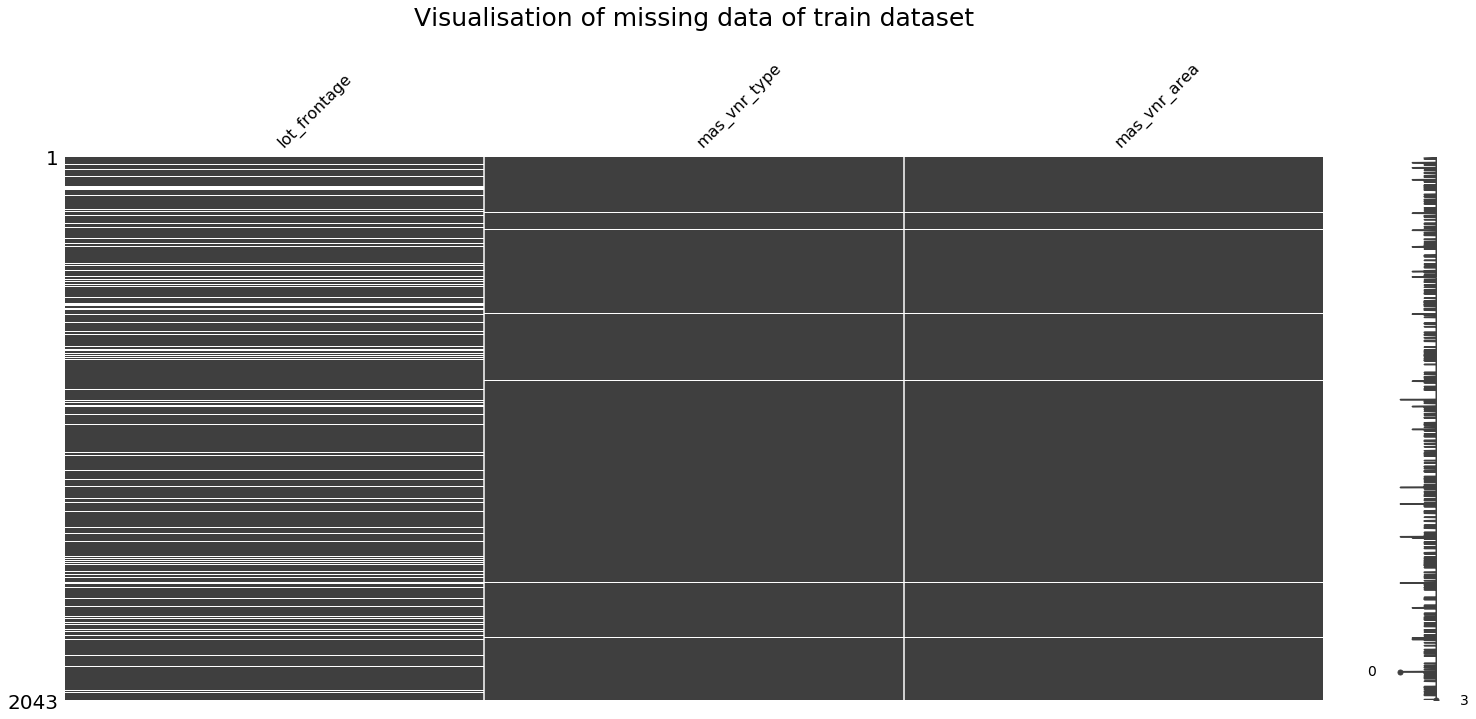

In [148]:
# Visualisation of missing data of train dataset
import missingno as msno
msno.matrix(df_train[df_train.columns[df_train.isnull().sum() > 0]])
plt.title('Visualisation of missing data of train dataset\n',fontsize=25);

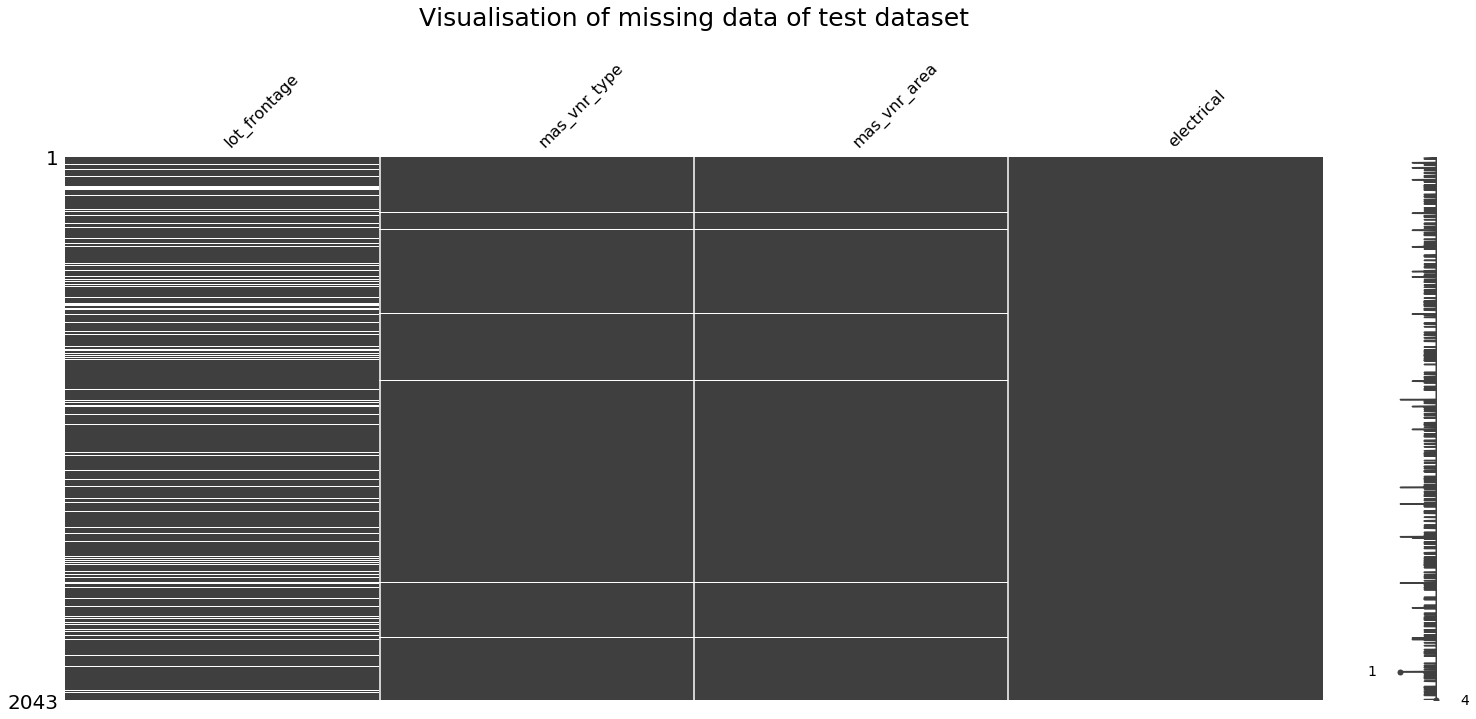

In [149]:
# Visualisation of missing data of test dataset
import missingno as msno
msno.matrix(df_train[df_test.columns[df_test.isnull().sum() > 0]])
plt.title('Visualisation of missing data of test dataset\n',fontsize=25);

It is clear that lot_frontage still have a lot of missing data (much more than 5%).
Columns mas_vnr_type and mas_vnr_area have only few.

Test dataset has one missing value in 'electrical' column

mas_vnr_type/mas_vnr_area columns

In [150]:
# Looking for moderate and strong correlations with 'mas_vnr_area' 
corr_area = df_train.corr()['mas_vnr_area']
corr_area[(corr_area >0.3) | (corr_area <-0.3)].sort_values(ascending=False)

mas_vnr_area     1.000000
saleprice        0.512317
overall_qual     0.437377
total_bsmt_sf    0.407790
1st_flr_sf       0.396695
gr_liv_area      0.391316
garage_area      0.383966
exter_qual       0.375789
garage_cars      0.360256
kitchen_qual     0.333188
year_built       0.328924
bsmtfin_sf_1     0.321497
bsmt_qual        0.314185
fireplace_qu     0.303187
Name: mas_vnr_area, dtype: float64

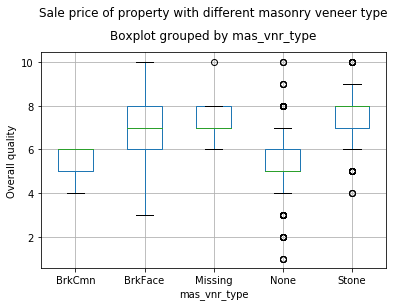

In [151]:
# Creating boxplot to see which type of veneer close to missing data by overall_qual
df_train['mas_vnr_type'].fillna(value='Missing',inplace=True)
df_train.boxplot(column='overall_qual',by='mas_vnr_type')
plt.title('Sale price of property with different masonry veneer type\n\n')
plt.ylabel('Overall quality');
# We can see that BrkFace and Stone is much close than None

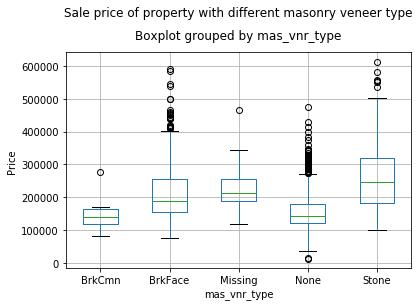

In [152]:
# Medians of Masonry veneer type differ with change in price of property (train dataset)
df_train.boxplot(column='saleprice',by='mas_vnr_type')
plt.title('Sale price of property with different masonry veneer type\n\n')
plt.ylabel('Price');
# The sale price of missing data is much close to BrkFace than None

The decision is to keep the columns mas_vnr_type and fill 22 missing values for train dataset and 1 missing value fo test dataset with 'BrkFace' and fill mas_vnr_area with the average value from 'BrkFace'.

In [153]:
df_train.groupby('mas_vnr_type')['mas_vnr_area'].mean()

mas_vnr_type
BrkCmn     194.000000
BrkFace    254.786284
Missing           NaN
None         0.523495
Stone      230.410714
Name: mas_vnr_area, dtype: float64

In [154]:
df_train.loc[df_train['mas_vnr_type']=='Missing','mas_vnr_area'] = 255.0
df_test['mas_vnr_type'].fillna(value='BrkFace',inplace=True)
df_train.loc[df_train['mas_vnr_type']=='Missing','mas_vnr_area'] = 255.0
df_test['mas_vnr_area'].fillna(value=255.0,inplace=True)

5 rows in train dataset and 2 in test dataset were identified without Masonry veneer but the area is greater than 0 that is impossible.

In [155]:
# train dataset
df_train[(df_train['mas_vnr_type'] == 'None')&(df_train['mas_vnr_area'] >0)][['mas_vnr_type','mas_vnr_area']]

,mas_vnr_type,mas_vnr_area
Id,,
1862,None,1.0
2529,None,288.0
1914,None,1.0
2004,None,1.0
364,None,344.0


In [156]:
# test dataset
df_test[(df_test['mas_vnr_type'] == 'None')&(df_test['mas_vnr_area'] >0)][['mas_vnr_type','mas_vnr_area']]

,mas_vnr_type,mas_vnr_area
Id,,
442,None,285.0
404,None,312.0


In [157]:
# All rows with values greater than 1 are counted as typos and fill with 0
df_train.loc[((df_train['mas_vnr_type'] == 'None')&(df_train['mas_vnr_area'] ==1)),'mas_vnr_area'] = 0

In [158]:
# we can see that BrkFace is the most popular veneer type
df_test.groupby('mas_vnr_type')['mas_vnr_area'].sum()

mas_vnr_type
BrkCmn      2365.0
BrkFace    70087.0
CBlock       198.0
None         597.0
Stone      20939.0
Name: mas_vnr_area, dtype: float64

In [159]:
# All remaining rows with values greater than 0 are counted as the most popular values type - BarkFace
df_train.loc[((df_train['mas_vnr_type'] == 'None')&(df_train['mas_vnr_area'] >0)),
             'mas_vnr_type'] = 'BrkFace'
df_test.loc[((df_test['mas_vnr_type'] == 'None')&(df_test['mas_vnr_area'] >0)),
            'mas_vnr_type'] = 'BrkFace'

In [160]:
print('train mas_vnr_type,area Nan:',((df_train['mas_vnr_type'] == 'None')&(df_train['mas_vnr_area'] >0)).sum())
print('test mas_vnr_type,area Nan:',((df_test['mas_vnr_type'] == 'None')&(df_test['mas_vnr_area'] >0)).sum())

train mas_vnr_type,area Nan: 0
test mas_vnr_type,area Nan: 0


Neighborhood column

In [161]:
# The number of neighbourhoods in train data is 28 but in teas data only 26
# We should take it into account later on if we will use this column for 
a = {i for i in df_train['neighborhood'].value_counts().index}
b = {i for i in df_test['neighborhood'].value_counts().index}
print(f'Neighborhoods which present in train but absent in test dataset {a-b}')

Neighborhoods which present in train but absent in test dataset {'GrnHill', 'Landmrk'}


lot_frontage column

In [162]:
corr_area = df_train.corr()['lot_frontage']
corr_area[(corr_area >0.3) | (corr_area <-0.3)].sort_values(ascending=False)

lot_frontage     1.000000
lot_area         0.575445
1st_flr_sf       0.462535
gr_liv_area      0.382226
totrms_abvgrd    0.361548
total_bsmt_sf    0.361491
garage_area      0.358672
saleprice        0.341482
ms_subclass     -0.388705
Name: lot_frontage, dtype: float64

We can see that lot_frontage feature has moderate correlation with saleprice (0.341842) and higher correlation with lot_area feature. To avoid multicolinearity I decided to drop this column.

In [163]:
df_train.drop(columns='lot_frontage',inplace=True)
df_test.drop(columns='lot_frontage',inplace=True)

In [164]:
df_train.isnull().sum().sum()
# train dataset has no more missing data

0

In [165]:
df_test.isnull().sum().sum()
# electrical column left, it will be considered in case of choosing this feature for predictions

1

### Data Type

In [166]:
# Checking numerical data type for train dataset
numeric_columns = df_train.select_dtypes(include=np.number)
numeric_columns.iloc[:5,:15]
numeric_columns.iloc[:5,15:30]
numeric_columns.iloc[:5,30:]

,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,...,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
109,1,4,6,0,0,2.0,475.0,3,3,0,...,0,0,0,0,0,0,0,3,2010,130500
544,1,4,8,1,3,2.0,559.0,3,3,0,...,0,0,0,0,0,0,0,4,2009,220000
153,1,4,5,0,0,1.0,246.0,3,3,0,...,0,0,0,0,0,0,0,1,2010,109000
318,1,3,7,0,0,2.0,400.0,3,3,100,...,0,0,0,0,0,0,0,4,2010,174000
255,1,3,6,0,0,2.0,484.0,3,3,0,...,0,0,0,0,0,0,0,3,2010,138500


In [167]:
# Checking categorical data type for train dataset
categorical_columns = df_train.select_dtypes(include='object')
categorical_columns.iloc[:5,:15]
categorical_columns.iloc[:5,15:]
# Data types correspond the values except 'garage_yr_blt'

,exterior_2nd,mas_vnr_type,foundation,bsmtfin_type_2,heating,electrical,functional,garage_type,garage_yr_blt,garage_finish,paved_drive,misc_feature,sale_type
Id,,,,,,,,,,,,,
109,Plywood,BrkFace,CBlock,Unf,GasA,SBrkr,Typ,Attchd,1976,RFn,Y,None,WD
544,VinylSd,BrkFace,PConc,Unf,GasA,SBrkr,Typ,Attchd,1997,RFn,Y,None,WD
153,VinylSd,None,CBlock,Unf,GasA,SBrkr,Typ,Detchd,1953,Unf,Y,None,WD
318,VinylSd,None,PConc,Unf,GasA,SBrkr,Typ,BuiltIn,2007,Fin,Y,None,WD
255,Plywood,None,PConc,Unf,GasA,SBrkr,Typ,Detchd,1957,Unf,N,None,WD


In [168]:
# Changing 'garage_yr_blt' data type to int, 'None' value replacing with a mean year
df_train['garage_yr_blt'].unique()
years = [int(year) for year in df_train['garage_yr_blt'].values if year != 'None']
mean = sum(years)/len(years)
df_train['garage_yr_blt'] = df_train['garage_yr_blt'].map(lambda year: int(year)
                                                        if isinstance(year,float) else mean)
sorted(df_train['garage_yr_blt'].unique())[-4:]
# there is a value 2207 which can not be the true value, it is counted as typo and change to 2007
df_train.loc[df_train['garage_yr_blt'] == 2207,'garage_yr_blt'] = 2007
df_train['garage_yr_blt'].dtypes

dtype('float64')

In [169]:
# Checking numerical data type for test dataset
numeric_columns = df_test.select_dtypes(include=np.number)
numeric_columns.iloc[:5,:15]
numeric_columns.iloc[:5,15:30]
numeric_columns.iloc[:5,30:]

,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold
Id,,,,,,,,,,,,,,,,,,,,
2658,2,2,9,0,0,1,440,1,1,0,60,112,0,0,0,0,0,0,4,2006
2718,2,3,10,0,0,2,580,3,3,170,0,0,0,0,0,0,0,0,8,2006
2414,1,4,7,1,4,2,426,3,3,100,24,0,0,0,0,0,0,0,9,2006
1989,1,3,5,0,0,2,480,2,3,0,0,184,0,0,0,0,0,0,7,2007
625,1,3,6,2,4,2,514,3,3,0,76,0,0,185,0,0,0,0,7,2009


In [170]:
# Checking categorical data type for test dataset
categorical_columns = df_test.select_dtypes(include='object')
categorical_columns.iloc[:5,:15]
categorical_columns.iloc[:5,15:]
# Same issue here with 'garage_yr_blt' data type

,exterior_2nd,mas_vnr_type,foundation,bsmtfin_type_2,heating,electrical,functional,garage_type,garage_yr_blt,garage_finish,paved_drive,misc_feature,sale_type
Id,,,,,,,,,,,,,
2658,AsbShng,None,Stone,Unf,GasA,FuseP,Typ,Detchd,1910,Unf,Y,None,WD
2718,Plywood,None,CBlock,Unf,GasA,SBrkr,Typ,Attchd,1977,Fin,Y,None,WD
2414,VinylSd,None,PConc,Unf,GasA,SBrkr,Typ,Attchd,2006,RFn,Y,None,New
1989,Wd Sdng,None,CBlock,Unf,GasA,SBrkr,Typ,Detchd,1935,Unf,N,None,WD
625,Plywood,BrkFace,CBlock,Unf,GasA,SBrkr,Typ,Attchd,1963,RFn,Y,None,WD


In [171]:
# Changing 'garage_yr_blt' data type to int, 'None' value replacing with a mean year
df_test['garage_yr_blt'].unique()
years = [int(year) for year in df_test['garage_yr_blt'].values if year != 'None']
mean = sum(years)/len(years)
df_test['garage_yr_blt'] = df_test['garage_yr_blt'].map(lambda year: int(year)
                                                        if isinstance(year,float) else mean)
df_test['garage_yr_blt'].dtypes

dtype('float64')

### Data Dictionary

|    Features     |                       Categories (str)                       |                  Categories representation                   | Type  |                         Description                          |
| :-------------: | :----------------------------------------------------------: | :----------------------------------------------------------: | :---: | :----------------------------------------------------------: |
|       pid       |                              -                               |                              -                               |  int  |            Property identification number (USA).             |
|   ms_subclass   | 1-STORY 1946 & NEWER ALL STYLES <br/>1-STORY 1945 & OLDER <br/>1-STORY W/FINISHED ATTIC ALL AGES <br/>1-1/2 STORY - UNFINISHED ALL AGES <br/>1-1/2 STORY FINISHED ALL AGES <br/>2-STORY 1946 & NEWER <br/>2-STORY 1945 & OLDER <br/>2-1/2 STORY ALL AGES <br/>SPLIT OR MULTI-LEVEL <br/>SPLIT FOYER <br/>DUPLEX - ALL STYLES AND AGES <br/>1-STORY PUD (Planned Unit Development) - 1946 & NEWER <br/>1-1/2 STORY PUD - ALL AGES <br/>2-STORY PUD - 1946 & NEWER <br/>PUD - MULTILEVEL - INCL SPLIT LEV/FOYER 190 2 FAMILY CONVERSION - ALL STYLES AND AGES | 20<br/>30<br/>40<br/>45<br/>50<br/>60<br/>70<br/>75<br/>80<br/>85<br/>90<br/>120<br/>150<br/>160<br/>180<br/>190 |  int  |                     The building class.                      |
|    ms_zoning    | Agriculture<br/>Commercial<br/>Floating Village Residential<br/>Industrial<br/>Residential High Density<br/>Residential Low Density<br/>Residential Low Density Park<br/>Residential Medium Density | RL<br/>RM<br/>FV<br/>C (all)<br/>A (agr)<br/>RH<br/>I (all)  |  str  |  Identifies the general zoning classification of the sale.   |
|    lot_area     |                              -                               |                              -                               |  int  |                   Lot size in square feet.                   |
|     street      |                       Gravel<br/>Paved                       |                        Grvl<br/>Pave                         |  str  |               Type of road access to property.               |
|      alley      |             Gravel<br/>Paved<br/>No alley access             |                    Grvl<br/>Pave<br/>None                    |  str  |              Type of alley access to property.               |
|    lot_shape    | Regular<br/>Slightly irregular<br/>Moderately Irregular<br/>Irregular |                 IR1<br/>Reg<br/>IR2<br/>IR3                  |  str  |                  General shape of property.                  |
|  land_contour   | Near Flat/Level<br/>Banked - Quick and significant rise from street grade to building<br/>Hillside - Significant slope from side to side<br/>Depression |                 Lvl<br/>HLS<br/>Bnk<br/>Low                  |  str  |                  Flatness of the property.                   |
|    utilities    | All public Utilities (E,G,W,& S)<br/>Electricity, Gas, and Water (Septic Tank)<br/>Electricity and Gas Only<br/>Electricity only |                        1<br/>2<br/>3                         |  int  |                 Type of utilities available.                 |
|   lot_config    | Inside lot<br/>Corner lot<br/>Cul-de-sac<br/>Frontage on 2 sides of property<br/>Frontage on 3 sides of property |        CulDSac<br/>Inside<br/>Corner<br/>FR2<br/>FR3         |  str  |                      Lot configuration.                      |
|   land_slope    |       Gentle slope<br/>Moderate Slope<br/>Severe Slope       |                     Gtl<br/>Sev<br/>Mod                      |  str  |                      Slope of property.                      |
|  neighborhood   | Bloomington Heights<br/>Bluestem<br/>Briardale<br/>Brookside<br/>Clear Creek<br/>College Creek<br/>Crawford<br/>Edwards<br/>Gilbert<br/>Iowa DOT and Rail Road<br/>Meadow Village<br/>Mitchell<br/>Names North Ames<br/>Northridge<br/>Northpark Villa<br/>Northridge Heights<br/>Northwest Ames<br/>Old Town<br/>South & West of Iowa State University<br/>Sawyer<br/>Sawyer West<br/>Somerset<br/>Stone Brook<br/>Timberland<br/>Veenker | 'Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',        'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',        'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',        'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',        'Blueste', 'GrnHill', 'Greens', 'Landmrk' |  str  |         Physical locations within Ames city limits.          |
|   condition_1   | Artery Adjacent to arterial street Feedr Adjacent to feeder street Norm Normal RRNn Within 200' of North-South Railroad RRAn Adjacent to North-South Railroad PosN Near positive off-site feature--park, greenbelt, etc. PosA Adjacent to postive off-site feature RRNe Within 200' of East-West Railroad RRAe Adjacent to East-West Railroad | 'RRAe', 'Norm', 'PosA', 'Artery', 'Feedr', 'PosN', 'RRAn', 'RRNe',        'RRNn' |  str  |             Proximity to main road or railroad.              |
|   condition_2   | Artery Adjacent to arterial street Feedr Adjacent to feeder street Norm Normal RRNn Within 200' of North-South Railroad RRAn Adjacent to North-South Railroad PosN Near positive off-site feature--park, greenbelt, etc. PosA Adjacent to postive off-site feature RRNe Within 200' of East-West Railroad RRAe Adjacent to East-West Railroad | 'Norm', 'RRNn', 'Feedr', 'Artery', 'PosA', 'PosN', 'RRAe', 'RRAn' |  str  | Proximity to main road or railroad (if a second is present)  |
|    bldg_type    | 1Fam Single-family Detached 2FmCon Two-family Conversion; originally built as one-family dwelling Duplx Duplex TwnhsE Townhouse End Unit TwnhsI Townhouse Inside Unit |        '1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex'         |  str  |                      Type of dwelling.                       |
|   house_style   | 1Story One story 1.5Fin One and one-half story: 2nd level finished 1.5Unf One and one-half story: 2nd level unfinished 2Story Two story 2.5Fin Two and one-half story: 2nd level finished 2.5Unf Two and one-half story: 2nd level unfinished SFoyer Split Foyer SLvl Split Level | '2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin',        '1.5Unf' |  str  |                      Style of dwelling.                      |
|  overall_qual   | 10 Very Excellent 9 Excellent 8 Very Good 7 Good 6 Above Average 5 Average 4 Below Average 3 Fair 2 Poor 1 Very Poor |   10<br/>9<br/>8<br/>7<br/>6<br/>5<br/>4<br/>3<br/>2<br/>1   |  int  |             Overall material and finish quality.             |
|  overall_cond   | 10 Very Excellent 9 Excellent 8 Very Good 7 Good 6 Above Average 5 Average 4 Below Average 3 Fair 2 Poor 1 Very Poor |   10<br/>9<br/>8<br/>7<br/>6<br/>5<br/>4<br/>3<br/>2<br/>1   |  int  |                   Overall condition rating                   |
|   year_built    |                              -                               |                              -                               |  int  |          Original construction date (1872 - 2010).           |
| year_remod/add  |                              -                               |                              -                               |  int  | Remodel date (same as construction date if no remodeling or additions)(1950-2010). |
|   roof_style    | Flat Flat Gable Gable Gambrel Gabrel (Barn) Hip Hip Mansard Mansard Shed Shed |     'Gable', 'Hip', 'Flat', 'Mansard', 'Shed', 'Gambrel'     |  str  |                        Type of roof.                         |
|    roof_matl    |                                                              | 'CompShg', 'WdShngl', 'Tar&Grv', 'WdShake', 'Membran', 'ClyTile' |  str  |                        Roof material.                        |
|  exterior_1st   | AsbShng Asbestos Shingles AsphShn Asphalt Shingles BrkComm Brick Common BrkFace Brick Face CBlock Cinder Block CemntBd Cement Board HdBoard Hard Board ImStucc Imitation Stucco MetalSd Metal Siding Other Other Plywood Plywood PreCast PreCast Stone Stone Stucco Stucco VinylSd Vinyl Siding Wd Sdng Wood Siding WdShing Wood Shingles | 'HdBoard', 'VinylSd', 'Wd Sdng', 'BrkFace', 'Plywood', 'MetalSd',        'AsbShng', 'CemntBd', 'WdShing', 'Stucco', 'BrkComm', 'Stone',        'CBlock', 'ImStucc', 'AsphShn' |  str  |                 Exterior covering on house.                  |
|  exterior_2nd   | AsbShng Asbestos Shingles AsphShn Asphalt Shingles BrkComm Brick Common BrkFace Brick Face CBlock Cinder Block CemntBd Cement Board HdBoard Hard Board ImStucc Imitation Stucco MetalSd Metal Siding Other Other Plywood Plywood PreCast PreCast Stone Stone Stucco Stucco VinylSd Vinyl Siding Wd Sdng Wood Siding WdShing Wood Shingles | 'Plywood', 'VinylSd', 'Wd Sdng', 'HdBoard', 'MetalSd', 'AsbShng',        'CmentBd', 'Wd Shng', 'BrkFace', 'Stucco', 'Brk Cmn', 'ImStucc',        'Stone', 'CBlock', 'AsphShn' |  str  |   Exterior covering on house (if more than one material).    |
|  mas_vnr_type   | BrkCmn Brick Common BrkFace Brick Face CBlock Cinder Block None None Stone Stone |       'BrkFace', 'None', 'Missing', 'Stone', 'BrkCmn'        |  str  |                     Masonry veneer type                      |
|  mas_vnr_area   |                              -                               |                              -                               | float |             Masonry veneer area in square feet.              |
|   exter_qual    |   Ex Excellent Gd Good TA Average/Typical Fa Fair Po Poor    |                  4<br/>3<br/>2<br/>1<br/>0                   |  int  |                  Exterior material quality.                  |
|   exter_cond    |   Ex Excellent Gd Good TA Average/Typical Fa Fair Po Poor    |               5<br/>4<br/>3<br/>2<br/>1<br/>0                |  int  |      Present condition of the material on the exterior.      |
|   foundation    | BrkTil Brick & Tile CBlock Cinder Block PConc Poured Contrete Slab Slab Stone Stone Wood Wood |     'CBlock', 'PConc', 'BrkTil', 'Slab', 'Stone', 'Wood'     |  str  |                     Type of foundation.                      |
|    bsmt_qual    | Ex Excellent (100+ inches) Gd Good (90-99 inches) TA Typical (80-89 inches) Fa Fair (70-79 inches) Po Poor (<70 inches) NA No Basement |               5<br/>4<br/>3<br/>2<br/>1<br/>0                |  int  |                   Height of the basement.                    |
|    bsmt_cond    | Ex Excellent Gd Good TA Typical - slight dampness allowed Fa Fair - dampness or some cracking or settling Po Poor - Severe cracking, settling, or wetness NA No Basement |               5<br/>4<br/>3<br/>2<br/>1<br/>0                |  int  |              General condition of the basement.              |
|  bsmt_exposure  | Gd Good Exposure Av Average Exposure (split levels or foyers typically score average or above) Mn Mimimum Exposure No No Exposure NA No Basement |                  4<br/>3<br/>2<br/>1<br/>0                   |  int  |           Walkout or garden level basement walls.            |
| bsmtfin_type_1  | GLQ Good Living Quarters ALQ Average Living Quarters BLQ Below Average Living Quarters Rec Average Rec Room LwQ Low Quality Unf Unfinshed NA No Basement |            6<br/>5<br/>4<br/>3<br/>2<br/>1<br/>0             |  int  |              Quality of basement finished area.              |
|  bsmtfin_sf_1   |                              -                               |                              -                               | float |                 Type 1 finished square feet.                 |
| bsmtfin_type_2  | GLQ Good Living Quarters ALQ Average Living Quarters BLQ Below Average Living Quarters Rec Average Rec Room LwQ Low Quality Unf Unfinshed NA No Basement |       'Unf', 'Rec', 'None', 'BLQ', 'GLQ', 'LwQ', 'ALQ'       |  str  |         Quality of second finished area (if present)         |
|  bsmtfin_sf_2   |                              -                               |                              -                               | float |                 Type 2 finished square feet.                 |
|   bsmt_unf_sf   |                              -                               |                              -                               | float |           Unfinished square feet of basement area.           |
|  total_bsmt_sf  |                              -                               |                              -                               | float |             Total square feet of basement area.              |
|     heating     | Floor Floor Furnace GasA Gas forced warm air furnace GasW Gas hot water or steam heat Grav Gravity furnace OthW Hot water or steam heat other than gas Wall Wall furnace |            'GasA', 'GasW', 'Grav', 'Wall', 'OthW'            |  str  |                       Type of heating.                       |
|   heating_qc    |   Ex Excellent Gd Good TA Average/Typical Fa Fair Po Poor    |                  4<br/>3<br/>2<br/>1<br/>0                   |  int  |                Heating quality and condition.                |
|   central_air   |                          N No Y Yes                          |                           0<br/>1                            |       |                  Central air conditioning.                   |
|   electrical    | SBrkr Standard Circuit Breakers & Romex FuseA Fuse Box over 60 AMP and all Romex wiring (Average) FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair) FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor) Mix Mixed |          'SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'           |  str  |                      Electrical system.                      |
|   1st_flr_sf    |                              -                               |                              -                               |  int  |                   First Floor square feet.                   |
|   2nd_flr_sf    |                              -                               |                              -                               |  int  |                  Second floor square feet.                   |
| low_qual_fin_sf |                              -                               |                              -                               |  int  |        Low quality finished square feet (all floors).        |
|   gr_liv_area   |                              -                               |                              -                               |  int  |        Above grade (ground) living area square feet.         |
| bsmt_full_bath  |                              -                               |                              -                               | float |                   Basement full bathrooms.                   |
| bsmt_half_bath  |                              -                               |                              -                               | float |                   Basement half bathrooms.                   |
|    full_bath    |                              -                               |                              -                               |  int  |                 Full bathrooms above grade.                  |
|    half_bath    |                              -                               |                              -                               |  int  |                   Half baths above grade.                    |
|  bedroom_abvgr  |                              -                               |                              -                               |  int  |           Number of bedrooms above basement level.           |
|  kitchen_abvgr  |                              -                               |                              -                               |  int  |                     Number of kitchens.                      |
|  kitchen_qual   |   Ex Excellent Gd Good TA Typical/Average Fa Fair Po Poor    |               5<br/>4<br/>3<br/>2<br/>1<br/>0                |  int  |                       Kitchen quality.                       |
|  totrms_abvgrd  |                              -                               |                              -                               |  int  |     Total rooms above grade (does not include bathrooms)     |
|   functional    | Typ Typical Functionality Min1 Minor Deductions 1 Min2 Minor Deductions 2 Mod Moderate Deductions Maj1 Major Deductions 1 Maj2 Major Deductions 2 Sev Severely Damaged Sal Salvage only |  'Typ', 'Mod', 'Min2', 'Maj1', 'Min1', 'Sev', 'Sal', 'Maj2'  |  str  |                  Home functionality rating                   |
|   fireplaces    |                              -                               |                              -                               |  int  |                    Number of fireplaces.                     |
|  fireplace_qu   | Ex Excellent - Exceptional Masonry Fireplace Gd Good - Masonry Fireplace in main level TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement Fa Fair - Prefabricated Fireplace in basement Po Poor - Ben Franklin Stove NA No Fireplace |               5<br/>4<br/>3<br/>2<br/>1<br/>0                |  int  |                      Fireplace quality.                      |
|   garage_type   | 2Types More than one type of garage Attchd Attached to home Basment Basement Garage BuiltIn Built-In (Garage part of house - typically has room above garage) CarPort Car Port Detchd Detached from home NA No Garage | 'Attchd', 'Detchd', 'BuiltIn', 'Basment', 'None', '2Types',        'CarPort' |  str  |                       Garage location.                       |
|  garage_yr_blt  |                              -                               |                              -                               |  int  |                    Year garage was built.                    |
|  garage_finish  | Fin Finished RFn Rough Finished Unf Unfinished NA No Garage  |                 'RFn', 'Unf', 'Fin', 'None'                  |  str  |                Interior finish of the garage.                |
|   garage_cars   |                              -                               |                              -                               | float |               Size of garage in car capacity.                |
|   garage_area   |                              -                               |                              -                               | float |                Size of garage in square feet.                |
|   garage_qual   | Ex Excellent Gd Good TA Typical/Average Fa Fair Po Poor NA No Garage |               5<br/>4<br/>3<br/>2<br/>1<br/>0                |  int  |                       Garage quality.                        |
|   garage_cond   | Ex Excellent Gd Good TA Typical/Average Fa Fair Po Poor NA No Garage |               5<br/>4<br/>3<br/>2<br/>1<br/>0                |  int  |                      Garage condition.                       |
|   paved_drive   |           Y Paved P Partial Pavement N Dirt/Gravel           |                        'Y', 'N', 'P'                         |  str  |                       Paved driveway.                        |
|  wood_deck_sf   |                              -                               |                              -                               |  int  |                Wood deck area in square feet.                |
|  open_porch_sf  |                              -                               |                              -                               |  int  |               Open porch area in square feet.                |
| enclosed_porch  |                              -                               |                              -                               |  int  |             Enclosed porch area in square feet.              |
|   3ssn_porch    |                              -                               |                              -                               |  int  |           Three season porch area in square feet.            |
|  screen_porch   |                              -                               |                              -                               |  int  |              Screen porch area in square feet.               |
|    pool_area    |                              -                               |                              -                               |  int  |                  Pool area in square feet.                   |
|     pool_qc     |  Ex Excellent Gd Good TA Average/Typical Fa Fair NA No Pool  |               5<br/>4<br/>3<br/>2<br/>1<br/>0                |  int  |                        Pool quality.                         |
|      fence      | GdPrv Good Privacy MnPrv Minimum Privacy GdWo Good Wood MnWw Minimum Wood/Wire NA No Fence |                  4<br/>3<br/>2<br/>1<br/>0                   |  int  |                        Fence quality.                        |
|  misc_feature   | Elev Elevator Gar2 2nd Garage (if not described in garage section) Othr Other Shed Shed (over 100 SF) TenC Tennis Court NA None |        'None', 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'        |  str  |    Miscellaneous feature not covered in other categories.    |
|    misc_val     |                              -                               |                              -                               |  int  |               $ Value of miscellaneous feature               |
|     mo_sold     |            1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12             |                                                              |  int  |                          Month Sold                          |
|     yr_sold     |                              -                               |                              -                               |  int  |                          Year Sold                           |
|    sale_type    | WD Warranty Deed - Conventional CWD Warranty Deed - Cash VWD Warranty Deed - VA Loan New Home just constructed and sold COD Court Officer Deed/Estate Con Contract 15 prcnt Down payment regular terms ConLw Contract Low Down payment and low interest ConLI Contract Low Interest ConLD Contract Low Down Oth Other | 'WD ', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI',        'ConLw' |  str  |                         Type of sale                         |

|    saleprice    |                              -                               |                              -                               |  int  |                         Sale Price $                         |

### Clean Datasets As csv

Now we can save clean datasets as csv

In [172]:
# Saving train and test data into csv files
df_train.to_csv('./datasets/train_clean.csv')
df_test.to_csv('./datasets/test_clean.csv')

## Exploratory Data Analysis

### Summary Statistics Of Train Dataset

In [173]:
# Looking at the statistics of numerical features
stats = df_train.describe().T
stats.rename(columns={'50%':'median'},inplace=True)
numeric_columns = df_train.select_dtypes(include=np.number)
stats['99%'] = np.percentile(numeric_columns,99,axis=0)
stats[['count', 'mean', 'median', 'std', 'min', 'max', '99%','25%','75%']].round(1)

,count,mean,median,std,min,max,99%,25%,75%
pid,2043.0,713386282.7,535453160.0,188682547.2,526301100.0,924152030.0,923252091.6,528458155.0,907175555.0
ms_subclass,2043.0,57.1,50.0,42.9,20.0,190.0,190.0,20.0,70.0
lot_area,2043.0,10050.1,9430.0,6703.9,1300.0,159000.0,32581.9,7500.0,11513.5
utilities,2043.0,3.0,3.0,0.0,1.0,3.0,3.0,3.0,3.0
overall_qual,2043.0,6.1,6.0,1.4,1.0,10.0,10.0,5.0,7.0
overall_cond,2043.0,5.6,5.0,1.1,1.0,9.0,9.0,5.0,6.0
year_built,2043.0,1971.7,1974.0,30.1,1872.0,2010.0,2008.0,1954.0,2001.0
year_remod/add,2043.0,1984.2,1993.0,21.0,1950.0,2010.0,2009.0,1964.5,2004.0
mas_vnr_area,2043.0,101.4,0.0,174.9,0.0,1600.0,755.0,0.0,167.5
exter_qual,2043.0,3.4,3.0,0.6,2.0,5.0,5.0,3.0,4.0


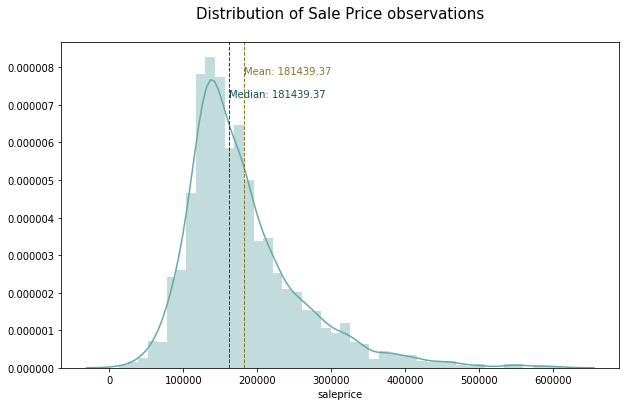

In [174]:
# Visualizing distribution of target variable (Sale price)
fig = plt.figure(figsize=(10,6))
sns.distplot(df_train['saleprice'],color='#65a8a7')
# creating mean and median lines and labels
plt.axvline(df_train['saleprice'].mean(), c='#8f7125', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df_train['saleprice'].mean(), max_ylim*0.9, 
         'Mean: {:.2f}'.format(df_train['saleprice'].mean()),color='#8f7125')
plt.axvline(df_train['saleprice'].median(), c='#144957', linestyle='dashed', linewidth=1)
plt.text(df_train['saleprice'].median(), max_ylim*0.83, 
         'Median: {:.2f}'.format(df_train['saleprice'].mean()),color='#144957')
plt.title('Distribution of Sale Price observations\n',fontsize=15);

From the statistics above it can be seen that all columns do not have any missing values and remained rows are 2043. Minimum and maximum values of all columns are normal.

Mean and median of the target variable (sale price) differ, the distribution is a bit skewed towards the right due to some number of outliers.

Outliers should be explored next.

### Outliers And Anomalies

In [175]:
# Creating function for looking for outliers
def find_outliers(df,stats,columns):
    '''
    Parameters:
    df - DataFrame
    stats - information from .describe() function: mean, 99 percentile
    columns - (list of str) - list with columns' names
    
    Calculates outliers based in 3 sigma-rule
    
    Returns:
    DataFrame with value if anomalies else NaN
    '''
    outliers = {}
    for column in columns:
        upper_level = stats.loc[column,'mean'] + 3*stats.loc[column,'std']
        level_99 = stats.loc[column,'99%']
        outlier_col = df[(df[column] >= upper_level)^(df[column] >= level_99)][column]
        outliers[column] = outlier_col
    return pd.DataFrame(outliers)

Inspection of numerical or categorical columns represented by numbers.

In [176]:
# Lookinf for outliers for each column
outliers_df = find_outliers(numeric_columns,stats,numeric_columns.columns)
print(f'Columns with outliers {len(outliers_df[outliers_df >0])} out of {len(df_train.columns)}')
print('Column  |  Number of outliers')
outliers = outliers_df.notnull().sum()
outliers

Columns with outliers 2043 out of 79
Column  |  Number of outliers


pid                  21
ms_subclass           0
lot_area              3
utilities          2041
overall_qual         23
overall_cond          0
year_built           51
year_remod/add       31
mas_vnr_area         25
exter_qual           81
exter_cond          215
bsmt_qual           184
bsmt_cond            89
bsmt_exposure       203
bsmtfin_type_1      614
bsmtfin_sf_1         12
bsmtfin_sf_2         45
bsmt_unf_sf          10
total_bsmt_sf         8
heating_qc         1059
central_air        1903
1st_flr_sf            3
2nd_flr_sf           14
low_qual_fin_sf       2
gr_liv_area           6
bsmt_full_bath        0
bsmt_half_bath        0
full_bath            43
half_bath           723
bedroom_abvgr        40
kitchen_abvgr         0
kitchen_qual        150
totrms_abvgrd        21
fireplaces          145
fireplace_qu         31
garage_yr_blt        63
garage_cars         274
garage_area           9
garage_qual          18
garage_cond        1873
wood_deck_sf          8
open_porch_sf   

52 out of 79 columns have at least one outlier value. We will consider rach column by looking at number of each unique value per variable.

In [177]:
# Creating a function to see the number of unique values in column
def unique_value_count(df,columns_list,limit=0.7):
    '''
    Parameters:
    df - DataFrame
    columns_list - (list of str) - list with columns' names
    limit - (int) - threashold of filter of relative frequencies of the unique values.
    
    Prints number of unique categories for columns where relative frequencies 
    of the unique values is higher than the limit (in percentages).
    
    Returns:
    not_ok_distr = list of columns where relative frequencies of the unique values are HIGHER than a limit.
    ok_distr = list of columns where relative frequencies of the unique values are LESS than a limit.
    '''
    count_columns = 0
    count_unequal = 0
    not_ok_distr = []
    ok_distr = []
    for column in columns_list:
        count_columns +=1
        categories = df[column].value_counts(normalize=True)
        if categories.values.max() > 0.7:
            not_ok_distr.append(column)
            count_unequal+=1
            print(categories)
            print('-------------------------')
        else:
            ok_distr.append(column)
    print(f'{count_unequal} from {count_columns} unequally distributed columns')
    return not_ok_distr, ok_distr

In [178]:
# Inspecting columns with a big number of outliers
not_ok_distr, ok_distr = unique_value_count(df_train,outliers.index)

3    0.999021
2    0.000489
1    0.000489
Name: utilities, dtype: float64
-------------------------
3    0.866373
4    0.105237
2    0.023984
5    0.003426
1    0.000979
Name: exter_cond, dtype: float64
-------------------------
3    0.895252
4    0.043563
2    0.031326
0    0.025942
1    0.002447
5    0.001468
Name: bsmt_cond, dtype: float64
-------------------------
0.0      0.879589
294.0    0.002447
162.0    0.001468
483.0    0.001468
180.0    0.001468
           ...   
174.0    0.000489
154.0    0.000489
278.0    0.000489
230.0    0.000489
522.0    0.000489
Name: bsmtfin_sf_2, Length: 204, dtype: float64
-------------------------
1    0.931473
0    0.068527
Name: central_air, dtype: float64
-------------------------
0       0.983847
80      0.001468
205     0.000979
362     0.000489
53      0.000489
108     0.000489
114     0.000489
120     0.000489
140     0.000489
144     0.000489
156     0.000489
234     0.000489
259     0.000489
312     0.000489
360     0.000489
1064    0.0004

The printed columns below demonstrate numbers of unique categories for columns where relative frequencies of the unique values are higher than 70% of entire values.

Most of these columns (17 from 52) are distributed very unequally. These 17 columns could be helpful for study anomalies by themself but for our purpose, it is better to drop them in both train and test datasets.

In [179]:
# Dropping 17 columns with high numbers of outliers and distributed highly unequally
df_train.drop(columns=not_ok_distr,inplace=True)
df_test.drop(columns=not_ok_distr,inplace=True)

Remained columns are inspected further with boxplots.

In [180]:
# Creating a function for boxplots
def subplot_boxplot(dataframe, list_of_list_columns,maintitle,figsize=(10,10)):
    """
    Plots a boxplot of the column which in list. 
    
    Parameters:
    dataframe
    list_of_list_columns - nested list with lists with pairs of columns as x and y axis.
    maintitle - (str) - main title for all scatterplots
    figsize - the custom size of a figure, 10x10 by default.
    
    Returns:
    Boxplot plot.
    """
    nrows = int(np.ceil(len(list_of_list_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=figsize)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_list_columns):
        sns.boxplot(dataframe[column],ax=ax[i],color='#65a8a7')
        ax[i].set_title(f'Boxplot of {column}\n', fontsize=20)
    #deleting empty subplot if list_of_list_columns is odd
    if len(list_of_list_columns)%2 !=0:
        fig.delaxes(ax[len(list_of_list_columns)]) 
    plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
    plt.suptitle(maintitle,fontsize=25)
    fig.subplots_adjust(top=0.95)
    plt.show()

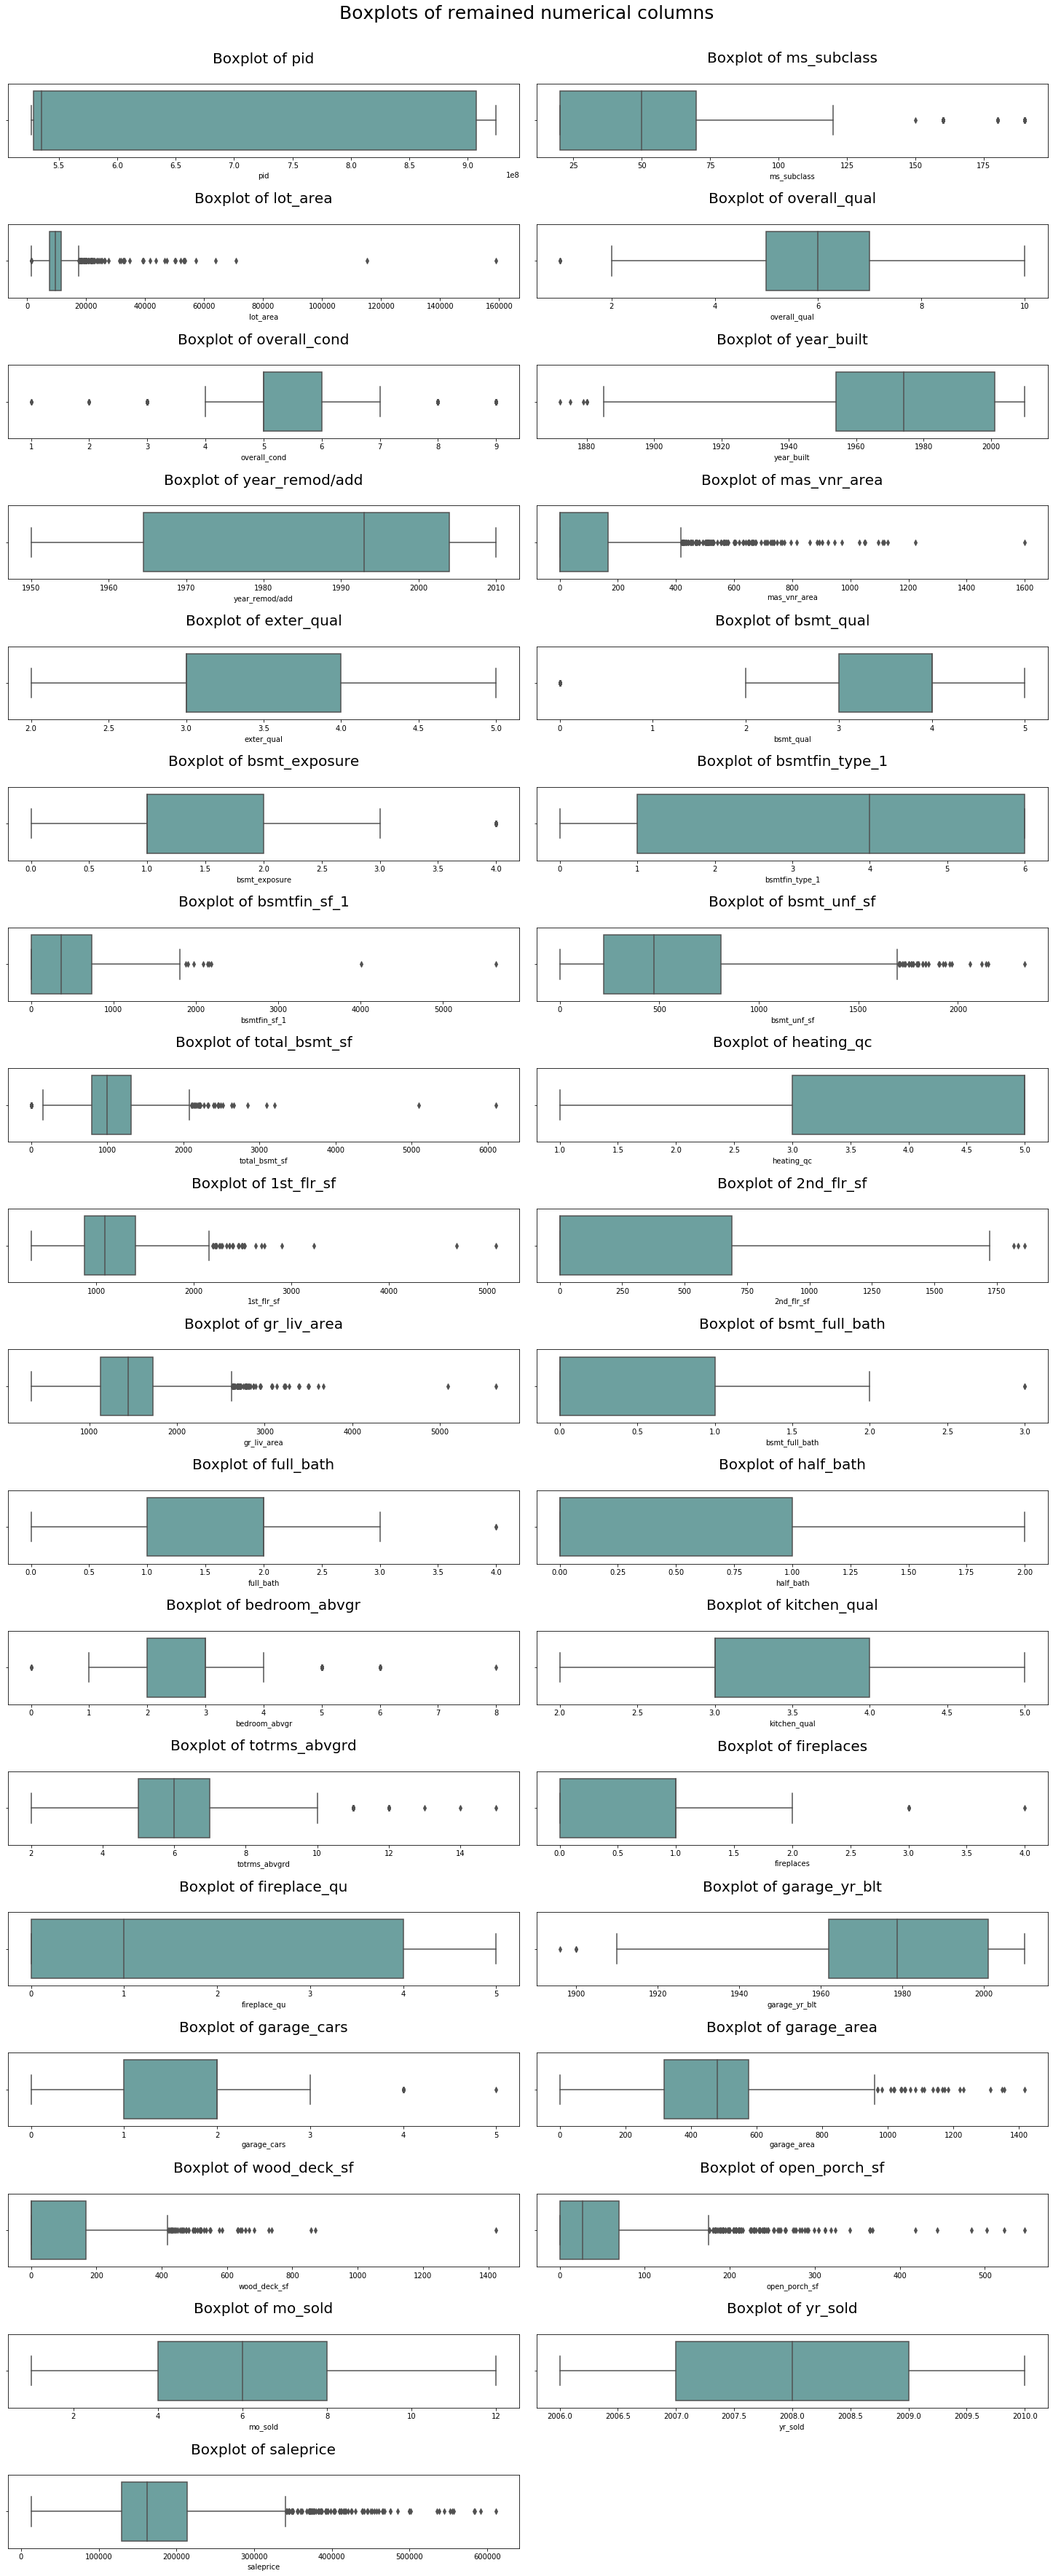

In [181]:
subplot_boxplot(df_train,ok_distr,figsize=(20,50),
               maintitle='Boxplots of remained numerical columns')

We can divide all columns into 3 categories.

- Almost nurmal distributed: 

   > 'pid', 'year_remod/add', 'exter_qual', 'bsmtfin_type_1', 'heating_qc', 'half_bath', 'kitchen_qual', 'fireplace_qu', 'mo_sold', 'yr_sold', 'garage_yr_blt'.

- Skewed distribution with some outliers: 

   > 'ms_subclass','overall_qual','overall_cond','year_built', 'bsmt_qual', 'bsmt_exposure', 'bsmt_unf_sf', '2nd_flr_sf', 'bsmt_full_bath', 'full_bath', 'bedroom_abvgr', 'totrms_abvgrd', 'fireplaces',  'garage_area','garage_cars', 'saleprice'.

- Very skewed distribution with many outliers: 

  > 'lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'wood_deck_sf', 'open_porch_sf'.

- Columns with unique anomalies which are far from other points: 

  > 'lot_area' (2, right), 'mas_vnr_area' (1, right), 'bsmtfin_sf_1' (2, right), 'total_bsmt_sf' (2, right), '1st_flr_sf' (2, right), 'gr_liv_area' (2, right), 'bedroom_abvgr' (1, right), 'fireplaces' (1, right), 'wood_deck_sf' (1, right).
  
  Let's explore the last category

In [182]:
# Printing anomalies
# Creating list with indices of rows with anomalies
indices = []
col_list = ['lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', '1st_flr_sf', 
'gr_liv_area', 'bedroom_abvgr', 'fireplaces', 'wood_deck_sf']
for column in col_list:
    if column in ['mas_vnr_area','bedroom_abvgr','fireplaces','wood_deck_sf','gr_liv_area'] :
        numb = 1
    else:
        numb = 2
    print(df_train.nlargest(numb+2,[column])[column])
    indices.append(df_train.nlargest(numb,[column]).index)
list_index = [i[0] for i in indices]+ [i[1] for i in indices if len(i)>1]
anomalies_id = sorted(list(set(list_index)))
anomalies_id

Id
2116    159000
2072    115149
2767     70761
1499     63887
Name: lot_area, dtype: int64
Id
1850    1600.0
2181    1224.0
1844    1129.0
Name: mas_vnr_area, dtype: float64
Id
1499    5644.0
2181    4010.0
45      2188.0
514     2158.0
Name: bsmtfin_sf_1, dtype: float64
Id
1499    6110.0
2181    5095.0
1773    3200.0
424     3094.0
Name: total_bsmt_sf, dtype: float64
Id
2181    5095
1499    4692
1773    3228
1573    2898
Name: 1st_flr_sf, dtype: int64
Id
1499    5642
2181    5095
2738    3672
Name: gr_liv_area, dtype: int64
Id
2195    8
670     6
900     6
Name: bedroom_abvgr, dtype: int64
Id
2499    4
1499    3
786     3
Name: fireplaces, dtype: int64
Id
2294    1424
2451     870
2523     857
Name: wood_deck_sf, dtype: int64


[1499, 1850, 2072, 2116, 2181, 2195, 2294, 2499]

It can be seen that these values are indeed anomalies. The decidion is to create a new df without anomalies and compare dataframes with and without anomalies by looking at scatterplots.

In [183]:
# Dropping the rows with anomalies
indices = df_train.loc[anomalies_id,['lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', 
                          '1st_flr_sf', 'gr_liv_area', 'bedroom_abvgr', 'fireplaces', 
                          'wood_deck_sf','saleprice']].index
df_train_no_outliers = df_train.drop(index=indices)

In [184]:
# Creating a function for scatterplots
def subplot_scatter(dataframe, list_of_list_columns,maintitle,figsize=(10,10)):
    """
    Plot a scatter plot of one column vs another column 
    
    Parameters:
    dataframe
    list_of_list_columns - nested list with lists with pairs of columns as x and y axis
    maintitle - (str) - main title for all scatterplots
    figsize - the custom size of a figure, 10x10 by default
    
    Returns:
    Scatter plot
    """
    nrows = int(np.ceil(len(list_of_list_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=figsize)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    y = dataframe['saleprice']
    for i, column in enumerate(list_of_list_columns):
        ax[i].scatter(dataframe[column],y,c='#65a8a7')
        ax[i].set_title(f'''The relationship\n between {column.replace("_"," ").title()} and\n SalePrice scores.''',
                        fontsize=14)
        ax[i].set(xlabel=column,ylabel='SalePrice')
        # Making a linear regression line on a scatter plot
        m, b = np.polyfit(dataframe[column], y, 1)
        ax[i].plot(dataframe[column], m*dataframe[column] + b,c='#8f7125')
    #deleting empty subplot if list_of_list_columns is odd
    if len(list_of_list_columns)%2 !=0:
        fig.delaxes(ax[len(list_of_list_columns)]) 
    plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
    plt.suptitle(maintitle,fontsize=20)
    fig.subplots_adjust(top=0.93)

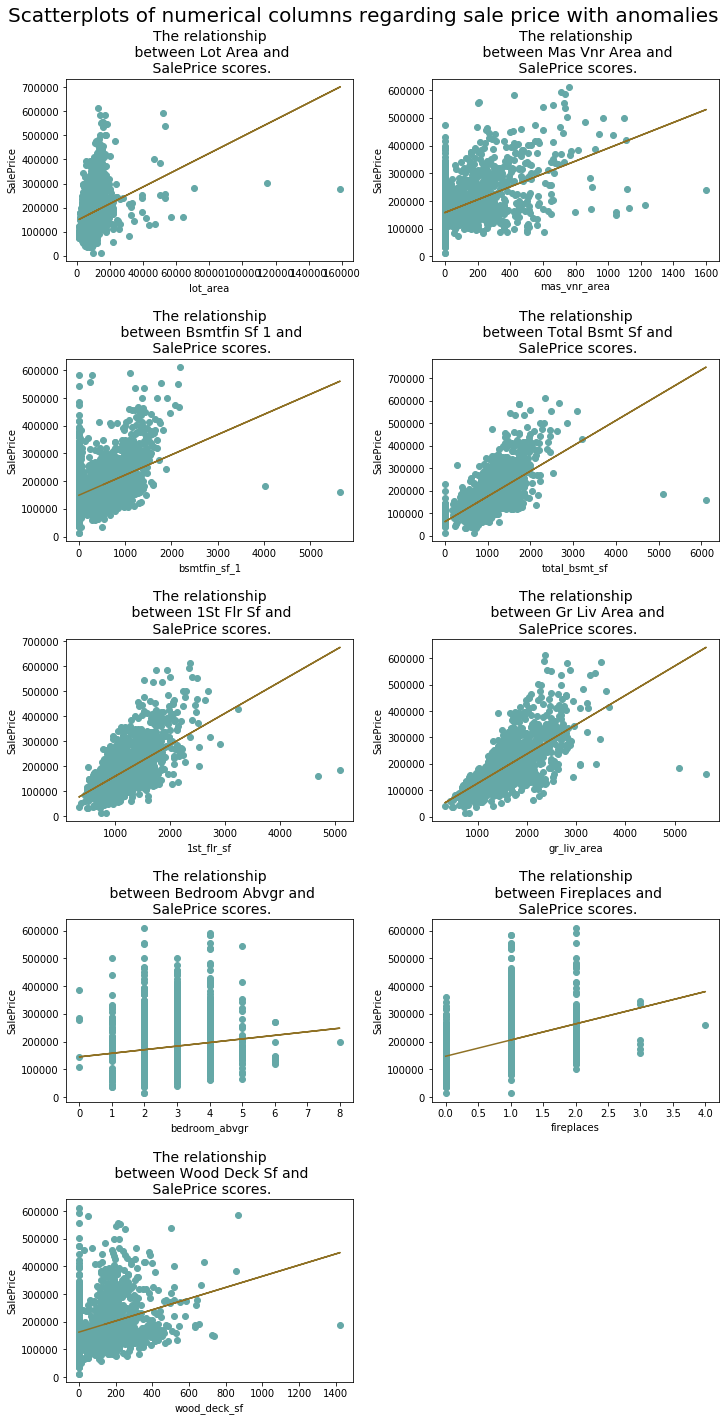

In [185]:
# Looking at scatterplots WITH anomalies
subplot_scatter(df_train, ['lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', 
                          '1st_flr_sf', 'gr_liv_area', 'bedroom_abvgr', 'fireplaces', 
                          'wood_deck_sf'],figsize=(10,20),
            maintitle='Scatterplots of numerical columns regarding sale price with anomalies')

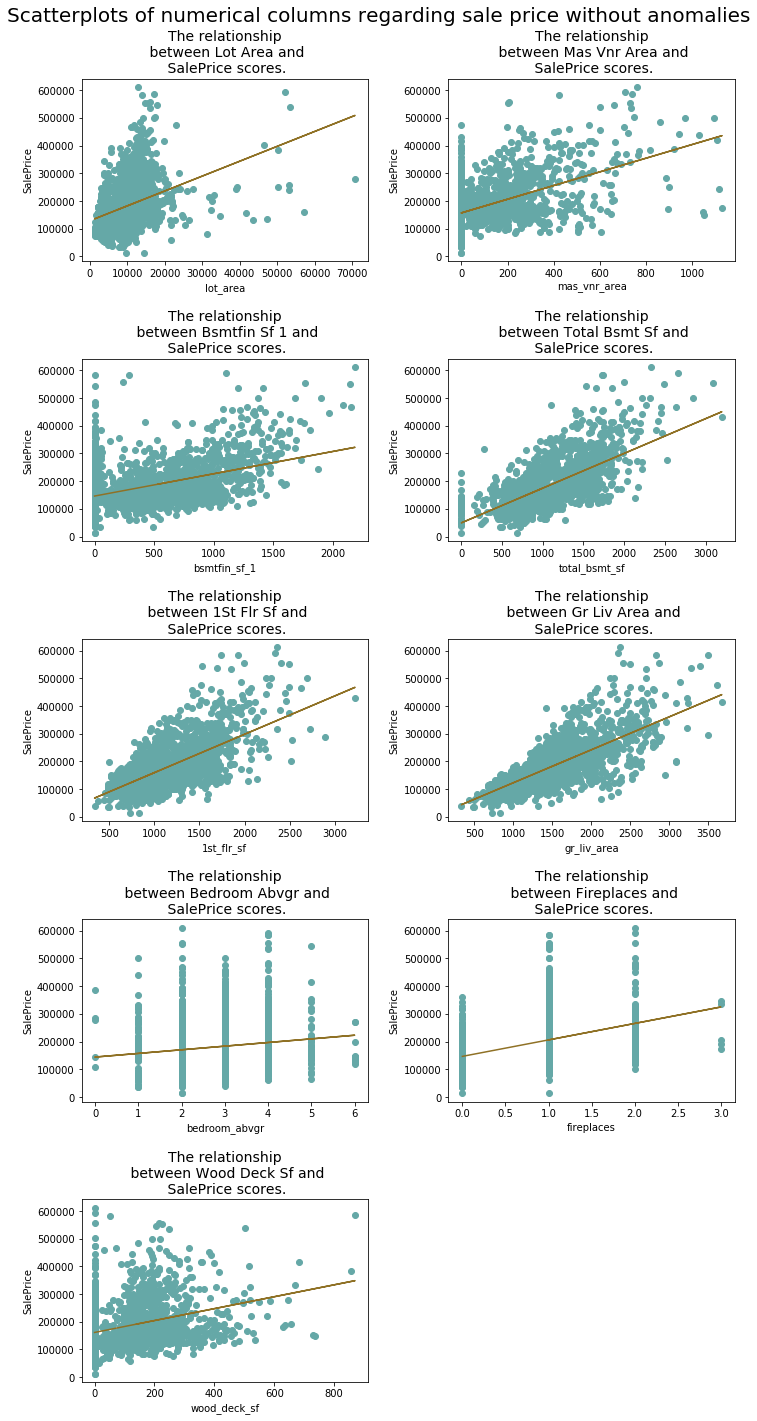

In [186]:
# Looking at scatterplots WITHOUT anomalies
subplot_scatter(df_train_no_outliers,['lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', 
                          '1st_flr_sf', 'gr_liv_area', 'bedroom_abvgr', 'fireplaces', 
                          'wood_deck_sf'],figsize=(10,20), 
            maintitle='Scatterplots of numerical columns regarding sale price without anomalies')

From the scatterplots, above we can see that chosen columns without anomalies are distributed more uniformly, will keep this version of dataframe. The relationship of the columns with saleprice we will explore later.

It is worth mentioning, that relationship columns 'bedroom_abvgr', 'fireplaces' with sale price will be better displayed by boxplot than scatterplot.

In [187]:
# Keeping version of dataframe without anomalies
df_train = df_train_no_outliers.copy()
# Keeping categorical columns' names which represented by numbers for later research
categor_number = ['bedroom_abvgr','fireplaces','overall_qual','exter_qual',
                    'bsmt_qual','bsmt_exposure','bsmtfin_type_1','heating_qc',
                    'bsmt_full_bath','full_bath','half_bath','kitchen_qual',
                    'totrms_abvgrd','fireplace_qu','garage_cars','mo_sold',
                    'yr_sold','ms_subclass']
# Keeping numerical columns' names for later research
numerical_features = [name for name in ok_distr
                      if name not in categor_number]

Inspection of columns with categorical values represented by strings is explored next.

In [188]:
# Dividing columns with unique categories for columns where relative frequencies of 
# the unique values are higher and less than the 0.7
not_ok_distr, ok_distr = unique_value_count(df_train,
                        df_train.select_dtypes(include='object').columns,limit=0.7)

RL         0.780344
RM         0.154300
FV         0.048649
C (all)    0.008845
RH         0.006388
A (agr)    0.000983
I (all)    0.000491
Name: ms_zoning, dtype: float64
-------------------------
Pave    0.99656
Grvl    0.00344
Name: street, dtype: float64
-------------------------
None    0.932187
Grvl    0.041769
Pave    0.026044
Name: alley, dtype: float64
-------------------------
Lvl    0.901229
HLS    0.041769
Bnk    0.037838
Low    0.019165
Name: land_contour, dtype: float64
-------------------------
Inside     0.734644
Corner     0.168550
CulDSac    0.063391
FR2        0.029484
FR3        0.003931
Name: lot_config, dtype: float64
-------------------------
Gtl    0.953317
Mod    0.042752
Sev    0.003931
Name: land_slope, dtype: float64
-------------------------
Norm      0.862408
Feedr     0.051597
Artery    0.034398
RRAn      0.017690
PosN      0.013268
RRAe      0.010319
PosA      0.005897
RRNn      0.002948
RRNe      0.001474
Name: condition_1, dtype: float64
--------------

It can be seen that 18 from 27 columns' values are distributed very unequally: ms_zoning, street, alley, land_contour, lot_config, land_slope, condition_1, condition_2, bldg_type, roof_style, roof_matl, bsmtfin_type_2, heating, electrical, functional, paved_drive, misc_feature, sale_type. These columns will no longer be considered.

In [189]:
# Dropping 18 columns with high numbers of outliers and distributed highly unequally
df_train.drop(columns=not_ok_distr,inplace=True)
df_test.drop(columns=not_ok_distr,inplace=True)

### Exploring Columns Relationship

Next step is an exploration of remained categorical columns represented by numbers and strings with boxplots in relationship with target variable (Sale Price).

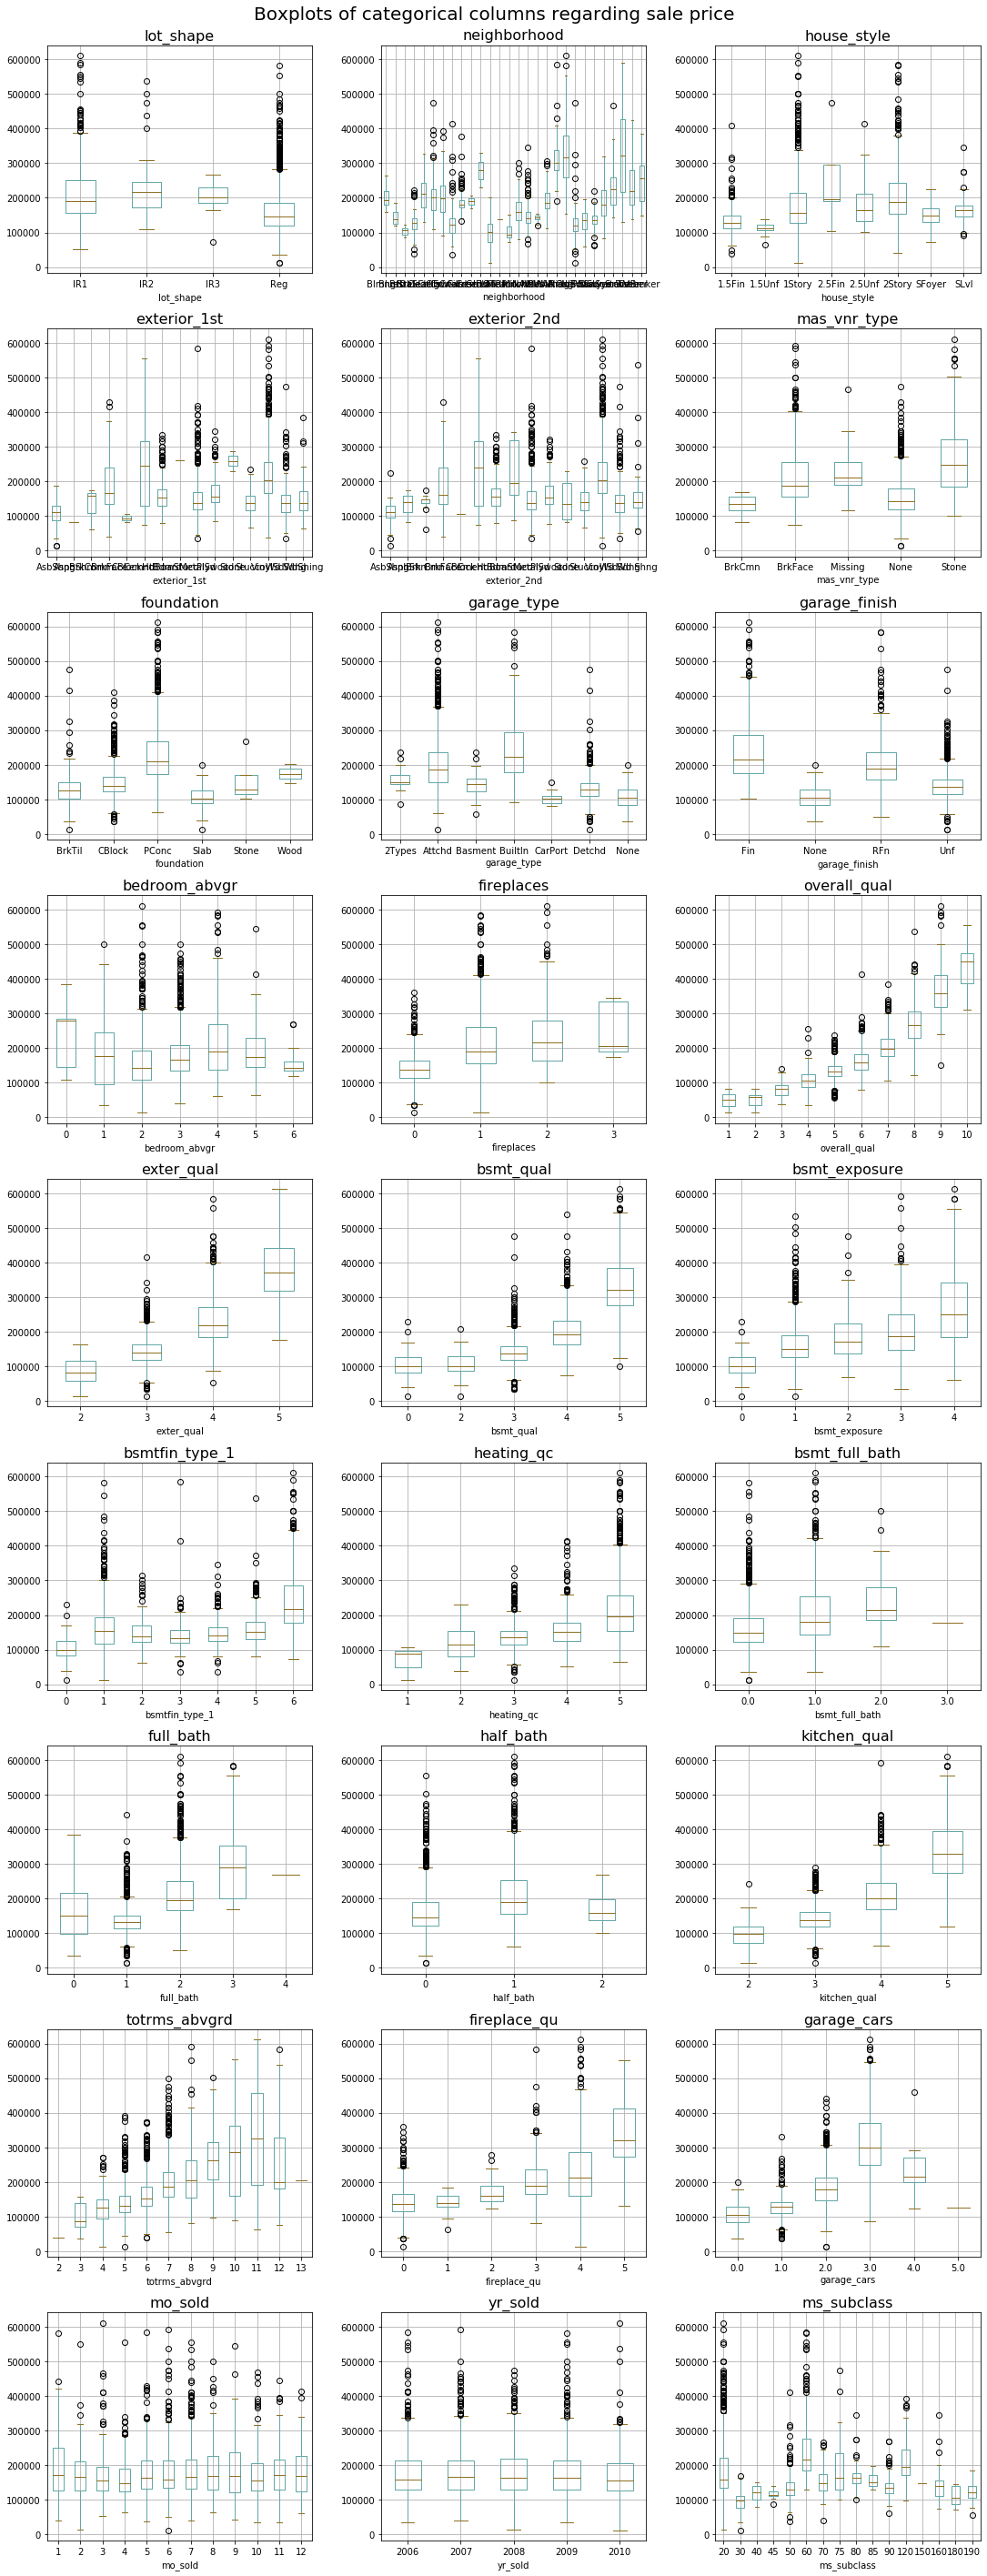

In [190]:
# Adding the columns with categories represented by numbers
categor_columns = ok_distr+categor_number
# Creating boxplots saleprice per value of columns
nrows = int(np.ceil(len(categor_columns)/3))
fig, ax = plt.subplots(nrows=nrows,ncols=3, figsize=(15,40))
ax = ax.ravel()
for i, column in enumerate(categor_columns):
    df_train.boxplot(column='saleprice',by=column,ax=ax[i],
        color=dict(boxes='#65a8a7', whiskers='#65a8a7', medians='#8f7125', caps='#8f7125'))
    ax[i].set_title(column,fontsize=16)
fig.suptitle('')
plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=1.3)
plt.suptitle('Boxplots of categorical columns regarding sale price',fontsize=20)
fig.subplots_adjust(top=0.965)
plt.show()

We can see from boxplots above that columns noticeably differ by categories regarding SalePrice:
    
 - with string categories: 'neighborhood','house_style','exterior_1st','exterior_2nd','mas_vnr_type','garage_type','garage_finish'.


 - with int categories:  
 'fireplaces','overall_qual','exter_qual','bsmt_qual','bsmt_exposure','heating_qc','full_bath',
'kitchen_qual','totrms_abvgrd','fireplace_qu'.

Columns which do not differ or showed minor difference regarding SalePrice:  

'lot_shape', 'foundation', 'bedroom_abvgr', 'bsmtfin_type_1', 'bsmt_full_bath', 'half_bath', 'garage_cars', 'mo_sold', 'yr_sold', 'ms_subclass'.


The third scatterplot above illustrates that the median and distribution of sale price vary regarding different house style.

Calculating the correlation coefficients for each categorical and numerical column which represented by int or float.

In [191]:
categor_numer_features = numerical_features + categor_number

df_correlation = df_train[categor_numer_features].corr()
column_corr = df_correlation[(df_correlation.saleprice > 0.5) | (df_correlation.saleprice < -0.5)]
correlate = column_corr['saleprice'].sort_values()
correlate

totrms_abvgrd     0.511936
garage_yr_blt     0.525042
mas_vnr_area      0.526765
full_bath         0.536892
fireplace_qu      0.538204
year_remod/add    0.549665
year_built        0.573751
bsmt_qual         0.618042
garage_cars       0.649431
1st_flr_sf        0.651645
garage_area       0.655907
total_bsmt_sf     0.668454
kitchen_qual      0.694898
exter_qual        0.717670
gr_liv_area       0.723066
overall_qual      0.804683
saleprice         1.000000
Name: saleprice, dtype: float64

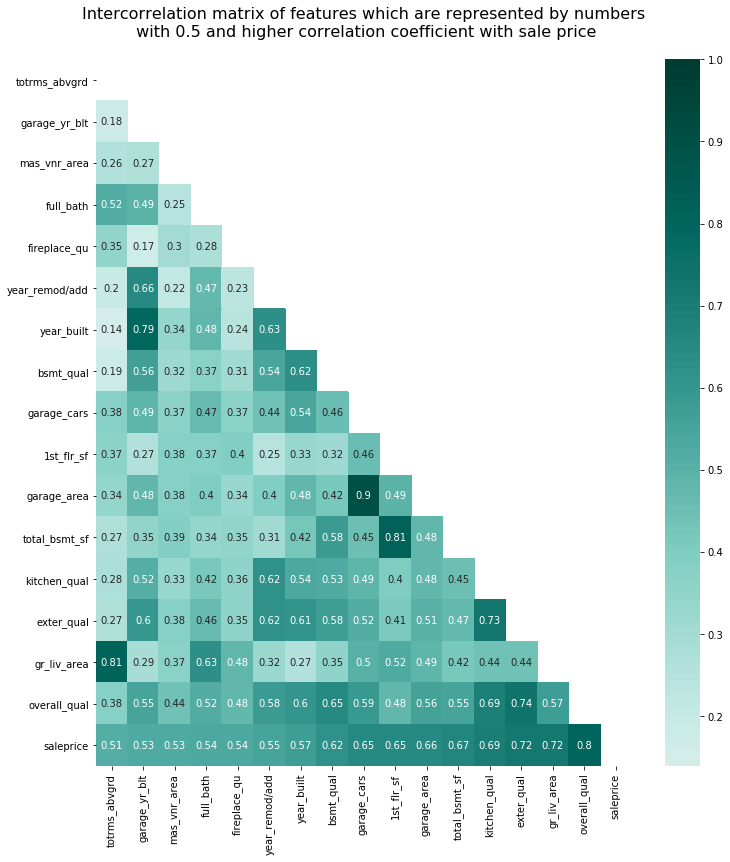

In [192]:
# Creating a heatmap to visualize correlations
fig = plt.figure(figsize=(12,13))
# Set up mask to be "True" in the upper triangle.
corr = df_correlation.loc[correlate.index,correlate.index]
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True,center=0,cmap="BrBG")
plt.title('Intercorrelation matrix of features which are\
 represented by numbers\n with 0.5 and higher correlation coefficient with sale price\n',
         fontsize=16);

From the heatmap absence of medium and strong negative correlation is noticeable. Sale price have strong correlation with features 'overall_qual' (0.8), 'gr_liv_area' (0.7), 'exter_qual' (0.72), 'kitchen_qual' (0.69), 'total_bsmt_sf' (0.67), 'garage_area' (0.65), '1st_flr_sf' (0.65), 'garage_cars' (0.65),  'bsmt_qual' (0.62), and some less than 0.6 : 'year_built', 'totrms_abvgrd', 'garage_yr_blt', 'mas_vnr_area', 'full_bath, 'fireplace_qu', 'year_remod/add'.

Some features such as 'garage_area' and 'garage_cars', 'year_built' and  'garage_yr_blt', 'total_bsmt_sf' and '1st_flr_sf' are highly correlated, but we will use lasso to sort it out.

The overall quality of property highly correlated with a sale price (0.804683). The coefficient is positive what means that with an increase in overall quality the sale price also increases.

The positive correlation coefficient for year_built (0.573751) demonstrates that newer properties cost higher than older ones.

Let's drop those numerical columns which have correlation coefficient with target variable less than 0.5 and those categorical columns which do not show sufficient difference of their distributions and medians regarding sale price.

In [193]:
# Preparing columns' names for dropping
remained_features = list(correlate.index) + ['fireplaces','overall_qual','exter_qual','bsmt_qual',
                                       'bsmt_exposure','heating_qc','full_bath', 'kitchen_qual',
                                       'totrms_abvgrd','fireplace_qu','neighborhood','house_style',
                                       'exterior_1st','exterior_2nd','mas_vnr_type','garage_type',
                                       'garage_finish']
for_drop = set(df_train.columns) - set(remained_features)
print(f'{len(set(remained_features))} from {len(df_train.columns)} are \
remained, {len(for_drop)} will be dropped')

27 from 44 are remained, 17 will be dropped


In [194]:
# Dropping columns with weak relationship with target variable
df_train.drop(columns=for_drop,inplace=True)
df_test.drop(columns=for_drop,inplace=True)

### Feature Creating

Some columns correlate with sale price much better together than along.

In [195]:
# Creating Polynomial Features for train dataset

# Spacing for each car
df_train['garage_capacity'] = df_train['garage_cars'] * df_train['garage_area']
# garage_cars 0.649431, garage_area 0.655907
# poly 0.694703

# Number of bathrooms regarding first-floor square feet
df_train['bath_1st_flr_sf'] = df_train['full_bath'] * df_train['1st_flr_sf']
# full_bath 0.536892, 1st_flr_sf 0.651645
# poly 0.711841

# Basement area and high
df_train['bsmt_sf_qual'] = df_train['total_bsmt_sf'] * df_train['bsmt_qual']
# total_bsmt_sf 0.668454, bsmt_qual 0.618042, totrms_abvgrd 0.511936
# poly 0.794651

# Total area of property
df_train['area_bsmt_garage_abvgrd'] = (df_train['total_bsmt_sf'] * df_train['garage_area'] 
                                       * df_train['totrms_abvgrd'])
# total_bsmt_sf 0.668454, garage_area 0.655907, 
# 0.825541

In [196]:
df_correlation1 = df_train[['garage_capacity','bath_1st_flr_sf','bsmt_sf_qual',
                          'area_bsmt_garage_abvgrd','saleprice']].corr()
correlate1 = df_correlation1['saleprice'].sort_values()
correlate1

garage_capacity            0.694703
bath_1st_flr_sf            0.711841
bsmt_sf_qual               0.794651
area_bsmt_garage_abvgrd    0.825541
saleprice                  1.000000
Name: saleprice, dtype: float64

In [197]:
# Creating Polynomial Features for test dataset
# Spacing for each car
df_test['garage_capacity'] = df_test['garage_cars'] * df_test['garage_area']

# Number of bathrooms regarding first-floor square feet
df_test['bath_1st_flr_sf'] = df_test['full_bath'] * df_test['1st_flr_sf']

# Basement area and high
df_test['bsmt_sf_qual'] = df_test['total_bsmt_sf'] * df_test['bsmt_qual']

# Total area of property
df_test['area_bsmt_garage_abvgrd'] = (df_test['total_bsmt_sf'] * df_test['garage_area'] 
                                       * df_test['totrms_abvgrd'])


We will not drop features which we use for creating polynomial features now, we will do it in Feature Selection section.

In [198]:
# Creating dummies columns from house style for train and test
# house style was chosen because this feature is a matter of interest of the project
df_train = pd.get_dummies(data=df_train,columns=['house_style'],drop_first=True)
df_test = pd.get_dummies(data=df_test,columns=['house_style'],drop_first=True)

In [199]:
# Deleting remained categorical str fearures
cat_col = df_train.select_dtypes(include='object')
df_train.drop(columns=cat_col,inplace=True)
df_test.drop(columns=cat_col,inplace=True)

In [200]:
# Checking difference between train and test data columns
unique_train_columns = set(df_train_dummies.columns) - set(df_test_dummies.columns)
unique_train_columns

NameError: name 'df_train_dummies' is not defined

In [ ]:
# Checking difference between test and train data columns
unique_test_columns = set(df_test_dummies.columns)-set(df_train_dummies.columns)
unique_test_columns

## Feature Selection

Most of the features were eliminated on Exploratory Data Analysis. Currently, we left with 30 features (which is the good number of features) but further exploration of some other technique of feature selection can be helpful.

#### Backward Elimination

[source](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)

The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

Here we are using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.

In [ ]:
# Creating X - features variables and y - target variable for train dataset
features = [col for col in df_train.columns if col !='saleprice']
print('Current number of features:', len(features))
X = df_train[features]
y = df_train['saleprice']
# We need to reduce the number of features to 25-30

In [ ]:
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

In [ ]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print('Final set of variables:',selected_features_BE)

We left with only 21 features.

#### Recursive Feature Elimination

Uses accuracy metric to rank the feature according to their importance.
- Takes the model to be used and the number of required features as input.
- Gives the ranking of all the variables, 1 being most important.

In [ ]:
from sklearn.feature_selection import RFE
# № of features from 1 to original number of columns
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score (R2) with %d features: %f" % (nof, high_score))

In [ ]:
cols = list(X.columns)
model = LinearRegression()
# Initializing RFE model
rfe = RFE(model, 12)             
# Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
# Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

We left with only 12 features.

In [ ]:
feat_all = ['overall_qual', 'year_built', 'year_remod/add', 'mas_vnr_area', 
     'exter_qual', 'bsmt_qual', 'bsmt_exposure', 'total_bsmt_sf', 
     'heating_qc', '1st_flr_sf', 'gr_liv_area', 'full_bath', 'kitchen_qual', 
     'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_area', 'bsmt_sf_qual', 
     'area_bsmt_garage_abvgrd', 'house_style_1Story', 'house_style_SLvl'] + ['overall_qual', 
    'exter_qual', 'bsmt_qual', 'bsmt_exposure', 'full_bath',
       'kitchen_qual', 'totrms_abvgrd', 'fireplaces', 'garage_cars',
       'house_style_1.5Unf', 'house_style_1Story', 'house_style_SFoyer']

In [ ]:
# Finding features for dropping suggested by both methods above
feat_set = set(feat_all)
columns_drop = set(df_train.columns) - feat_set
columns_drop

We will keep these 6 suggested features by methods above. The decision will be made after Lasso Regularization method is used.

Based on feature selection and Lasso penalty below, the features ('bath_1st_flr_sf','fireplace_qu','garage_capacity') will be dropped. Dummies features will be keeped because test data have not been tested and these features can be important for it.

In [ ]:
df_train.drop(columns=['bath_1st_flr_sf','fireplace_qu','garage_capacity'],inplace=True)
df_test.drop(columns=['bath_1st_flr_sf','fireplace_qu','garage_capacity'],inplace=True)

## Preprocessing Data

In [ ]:
# Creating X - features variables and y - target variable for train and test dataset
features = [col for col in df_train.columns if col !='saleprice']
X = df_train[features]
y = df_train['saleprice']
X_test = df_test[features]

In [ ]:
# Standardizing train and test features
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X) # for train used fit_transform
X_test_scaled = ss.transform(X_test) # for test transform only

In [ ]:
# Splitting scaled train dataset for further verification of model
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled,y)

## Modeling And Evaluation

Baseline model: mean of price.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
yhat = [np.mean(y) for i in range(len(y))]
test_rmse = np.sqrt(mean_squared_error(y_true=y, y_pred=yhat))
test_r2 = r2_score(y_true=y, y_pred=yhat)
print('--- Baseline model scores ---')
print('Root mean squared error RMSE:', test_rmse)
print('R2:', test_r2)

Three type of modeling will be deploied: Lasso Linear Regression, Multilinear regression and Ridge Linear Regression.

### Lasso

In [ ]:
# Choosing best alpha for lasso model
lasso_alpha = np.arange(60,100,1)
lasso_model = LassoCV(alphas=lasso_alpha,cv=5,tol=0.01)
lasso_model.fit(X_train,y_train)
opt_alpha_lasso = lasso_model.alpha_
opt_alpha_lasso

In [ ]:
# Modeling with best alpha
lasso_optimal = Lasso(alpha=opt_alpha_lasso,tol=0.01)
lasso_scores = cross_val_score(lasso_optimal,X_train,y_train)
# R2 for splitting data
print(lasso_scores.mean())
lasso_scores

In [ ]:
# Fitting model using full dataset
lasso_optimal.fit(X_train_scaled,y)
# Evaluating R2 score for full data
lasso_optimal.score(X_train_scaled,y)

In [ ]:
# Creating a scatterplot to test for randomness of residuals
predictions = lasso_optimal.predict(X_train_scaled)
residuals = y - predictions
plt.scatter(predictions,residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals');

In [ ]:
# Model scores of train data
test_rmse = np.sqrt(mean_squared_error(y_true=y, y_pred=predictions))
test_r2 = r2_score(y_true=y, y_pred=predictions)
print('--- Lasso model scores ---')
print('Root mean squared error RMSE:', test_rmse)
print('R2:', test_r2)

In [ ]:
# Joining coefficient and features and plot them to see which feature have influence on target
features_coeffitient = pd.Series(lasso_optimal.coef_,X.columns)
# If 0 - lasso eliminating these features
# Plotting barchart for the influencing features

features_coeffitient.plot.barh(figsize=(10,7),color='#65a8a7')
plt.title('Features coefficient of importance\n negarive \
                                     positive',fontsize=16)
plt.plot((-2,31),color='#8f7125')
plt.grid(axis='y');

Lasso evaluation.

The r2 score is high enough (0.8961671756077313) which means that the model predicts better than the baseline model (mean).

        --- Baseline model scores ---
        Root mean squared error RMSE: 79309.30582989656
        R2: 0.0
        
        --- Lasso model scores ---
        Root mean squared error RMSE: 25555.91779216108
        R2: 0.8961671756077313


R2 scores are consistent what can be interpreted that the model is not overfitting.

The scores are high enough to say that the model is not underfitting.

The RMSE is much smaller than baseline, that means that LR model fits the data better.

It can be seen that residuals distributed homoscedastic, but not really random due to outliers.

According to lasso 1 feature can be eliminated.

### Linear Regression

In [ ]:
# Instantiate models
lr = LinearRegression()

In [ ]:
# Evaluation lr model with cross_val_score.
lr_scores = cross_val_score(lr,X_train,y_train)
# Checking R2 scores for train
print(lr_scores.mean())
lr_scores

In [ ]:
# Fitting whole train data
lr.fit(X_train_scaled,y)
# Evaluating R2 score for whole data
lr.score(X_train_scaled,y)
# R2 scores are consistent what can be interpret that the model is not overfit
# The scores is high enough to say that the model is not underfitting

In [ ]:
# Creating a scatterplot to test for randomness of residuals
predictions = lr.predict(X_train_scaled)
residuals = y - predictions
plt.scatter(predictions,residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals');
# It can be seen that residuals distributed homoscedastic, but not really random due to outliers

In [ ]:
# Model scores of train data
test_rmse = np.sqrt(mean_squared_error(y_true=y, y_pred=predictions))
test_r2 = r2_score(y_true=y, y_pred=predictions)
print('--- LR model scores ---')
print('Root mean squared error RMSE:', test_rmse)
print('R2:', test_r2)

Linear Regression evaluation.

The R2 score is a bit higher (0.8965824658431704) than Lasso (0.8961671756077313).

        --- Baseline model scores ---
        Root mean squared error RMSE: 79309.30582989656
        R2: 0.0
        
        --- Lasso model scores ---
        Root mean squared error RMSE: 25555.91779216108
        R2: 0.8961671756077313
        
        --- LR model scores ---
        Root mean squared error RMSE: 25504.75980561859
        R2: 0.8965824658431704


R2 scores are consistent what can be interpreted that the model is not overfitting.

The scores are high enough to say that the model is not underfitting.

The RMSE is a bit smaller than Lasso, that means that LR model fits the data better.

It can be seen that residuals distributed homoscedastic, but not really random due to outliers.

### Ridge

In [ ]:
# Choosing best alpha for lasso model
r_alpha = np.logspace(0,5,200)
ridge_model = RidgeCV(alphas = r_alpha,store_cv_values=True)
ridge_model.fit(X_train,y_train)
opt_alpha_ridge = ridge_model.alpha_
opt_alpha_ridge

In [ ]:
# Modeling with best alpha
ridge_optimal = Ridge(alpha=opt_alpha_ridge)
ridge_scores = cross_val_score(ridge_optimal,X_train,y_train)
# R2 for splitting data
print(ridge_scores.mean())
ridge_scores

In [ ]:
# Fitting model using full dataset
ridge_optimal.fit(X_train_scaled,y)
# Evaluating R2 score for full data
ridge_optimal.score(X_train_scaled,y)
# The r2 score is a bit less in comparison with lr (0.9379541967547681) 
# and almost the same with lasso (0.927417956430073)
# R2 scores are consistent what can be interpret that the model is not overfit
# The scores is high enough to say that the model is not underfitting

In [ ]:
# Creating a scatterplot to test for randomness of residuals
predictions = ridge_optimal.predict(X_train_scaled)
residuals = y - predictions
plt.scatter(predictions,residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals');
# It can be seen that residuals distributed homoscedastic, but not really random due to outliers

In [ ]:
# Model scores of train data
test_rmse = np.sqrt(mean_squared_error(y_true=y, y_pred=predictions))
test_r2 = r2_score(y_true=y, y_pred=predictions)
print('--- Ridge model scores ---')
print('Root mean squared error RMSE:', test_rmse)
print('R2:', test_r2)

Ridge evaluation.

The R2 score is a bit less (0.8958343463996501) in comparison with LR (0.8965824658431704).

        --- Baseline model scores ---
        Root mean squared error RMSE: 79309.30582989656
        R2: 0.0
        
        --- Lasso model scores ---
        Root mean squared error RMSE: 25555.91779216108
        R2: 0.8961671756077313
        
        --- LR model scores ---
        Root mean squared error RMSE: 25504.75980561859
        R2: 0.8965824658431704
        
        --- Ridge model scores ---
        Root mean squared error RMSE: 25596.84391872191
        R2: 0.8958343463996501

R2 scores are consistent what can be interpreted that the model is not overfitting.

The scores are high enough to say that the model is not underfitting.

The RMSE is higher than LR model, that means that LR model fits the data worse.

It can be seen that residuals distributed homoscedastic, but not really random due to outliers.

#### All models gave very similar results, but the LR model perform slightly better. The decision is to keep the first model of Linear Regression due to best R2 and RMSE score.¶

In [ ]:
# Ploting the model
predictions = lr.predict(X_train_scaled)
plt.figure(figsize=(12,6))
plt.scatter(predictions,y)
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Predicted and actual price');

## Pridictions

In [ ]:
# Using LR model to predict price based on testing dataset
predictions = lr.predict(X_test_scaled)

In [ ]:
# Creating DataFrame from predicted price and ids
ids = df_test.index
d = {'Id': ids, 'SalePrice': predictions}
result = pd.DataFrame(data=d)

In [ ]:
result.to_csv('./datasets/result.csv',index=False)

In [ ]:
sns.distplot(predictions,color='#65a8a7')

## Inference

In [ ]:
d = {'id': features, 'intercept': lr.intercept_,'slope':lr.coef_,}
result = pd.DataFrame(data=d)
result.sort_values(by='slope')

Based on slope and intercept we can see that the start price of the properties in Ames is $ 181263.
Price increase with an increase in both basement area and high,above-ground living area and a total area of the property. 

A second important feature is the overall quality of the property. With an increase in 1 grade of quality the price increase on $ 13986.

House style 'One story' is cost more than other styles. Other styles are similar, but house style 'Two-story' is cheaper than others

Interestingly, that some features such ad total_bsmt_sf, 1st_flr_sf, bsmt_qual show the opposite trend: with an increase in 1 unit the price decrease on $ 23204 -6522. Those features should be explored further.

## Conclusion

Answering question of our project:
    
 1. With an increase of Overall Quality of property does price increase?
**Yes, the price of the property increase**
 - The overall quality of property highly correlated with a sale price (0.804683). The coefficient is positive what means that with an increase in overall quality the sale price also increases.
 - overall quality one of the most influencing features. With an increase in 1 grade of quality the price increase on $ 13986.

 2. Does the price vary with different House Style?
 **Yes, price differ**
 - From the scatterplot above we could see that the median and distribution of sale price vary regarding different house style.
 - 'One story' House style is cost more than other styles.

 3. Does older property cost less than newer ones?
**Yes, the older property cost less**
 - The positive correlation coefficient for year_built (0.573751) demonstrates that newer properties cost higher than older ones.
 - With an increase in one year the property rise in price in $ 5069.

## Recommendations

**To House Owners, Landlords, Real Estate Agents:**

Features which increase the price of your property:
1. Basement and the overall area of the property.
2. Overall material and finish quality.
3. A number of fireplaces.
4. 'One story' house style.


**To House Buyers:**
1. Houses which were built earlier cost less.
2. Kitchen quality influence on sale price. The cost of renovation of the kitchen should be considered. With an increase in kitchen quality on 1 point, the price rise in $ 6183.

3. Exterior material quality increase price not so drastically, on $ 3879 with better quality. It means that the exterior can be misleading.

## Further research suggestions

The built model of the prediction sale price of property of Ames should be explored on other datasets. It is possible that the model will show worse prediction in other locations.

Further research should consider:
- To evaluate the generalizability of the model more data required.
- Prices higher than $ 500,000 should be explored separately. The model shows worse predictions for such a high price. More data should be collected for high price property separately.
- Features with a negative slope. Additional models should be built to evaluate the influence of the features on price.
- Use more complicated models for prediction.

Public Score now: 28980.29521
    
Public Score for Kaggle: 25888.84521
    
Private Score now: 33462.61116

Private Score for Kaggle: 34211.28292 